In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from utils import *
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

In [25]:
error_not_distracted_list, u_signal_not_distracted_list, x_signal_not_distracted_list = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/x.csv')
error_distracted_list, u_signal_distracted_list, x_signal_distracted_list         = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDCE/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDCE/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDCE/x.csv')

In [26]:
error_signal_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=',')
tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')
u_signal_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', delimiter=',')
x_signal_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv', delimiter=',')

tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')

In [27]:
person_idx = 0
idx = person_idx*4 + 0

# combine the entire list in the priors
error_not_distracted = np.concatenate(error_not_distracted_list[person_idx])
u_not_distracted = np.concatenate(u_signal_not_distracted_list[person_idx])
x_not_distracted = np.concatenate(x_signal_not_distracted_list[person_idx])

error_distracted = np.concatenate(error_distracted_list[person_idx])
u_distracted = np.concatenate(u_signal_distracted_list[person_idx])
x_distracted = np.concatenate(x_signal_distracted_list[person_idx])

X_not_distracted = np.stack(
    [error_not_distracted, u_not_distracted], axis=-1
)

X_distracted = np.stack([error_distracted, u_distracted], axis=-1)

In [28]:
all_probabilities = np.loadtxt(r'/home/mihai/Thesis/Data/Models/all_probabilities.csv', delimiter=',')

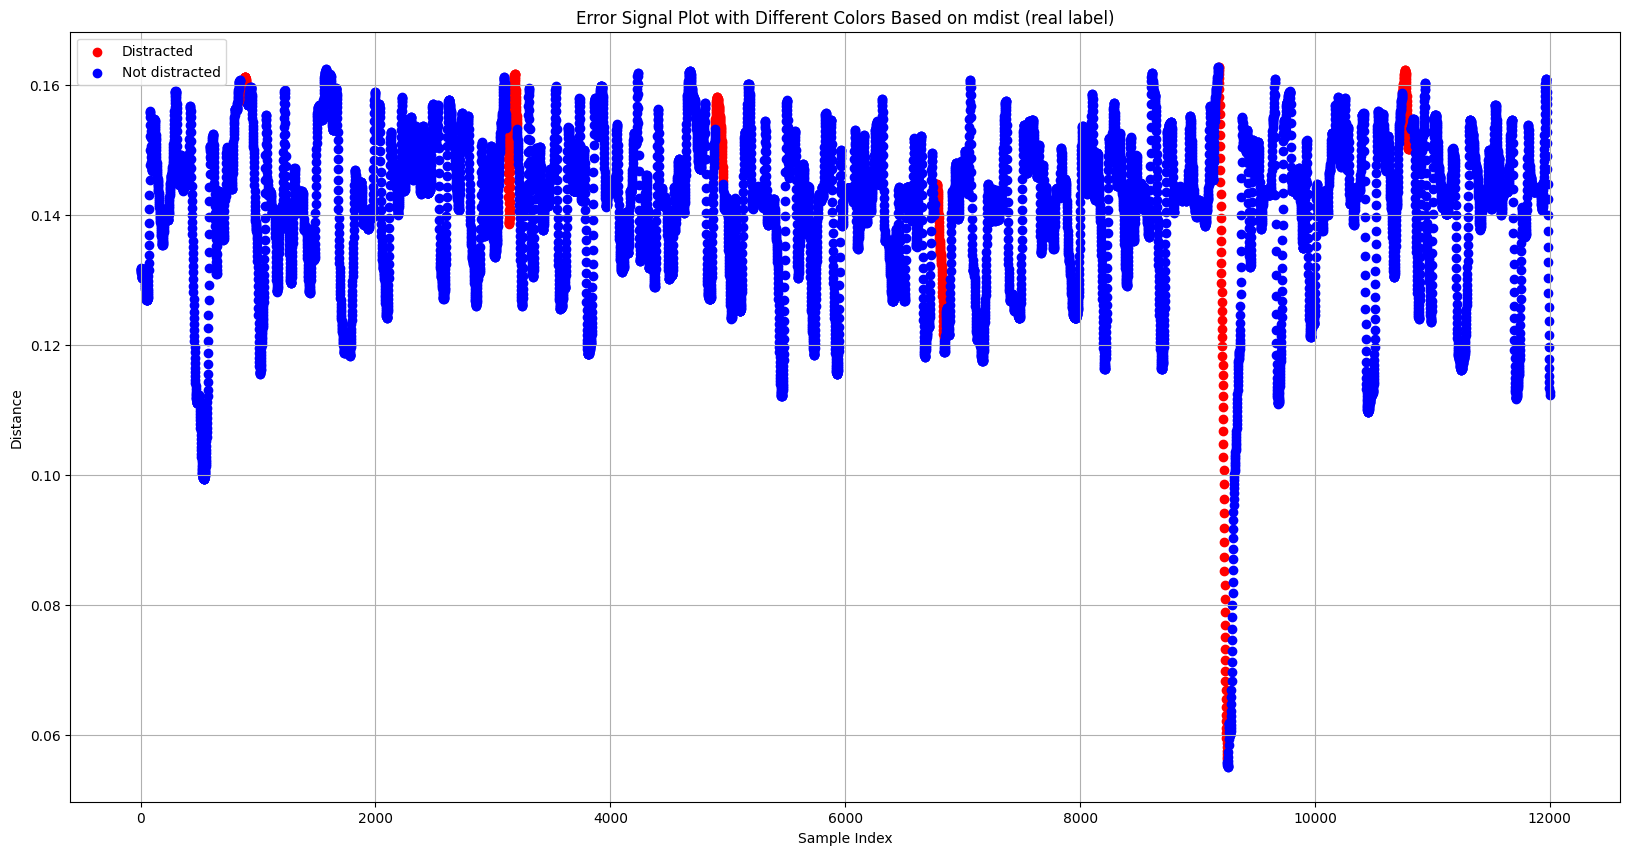

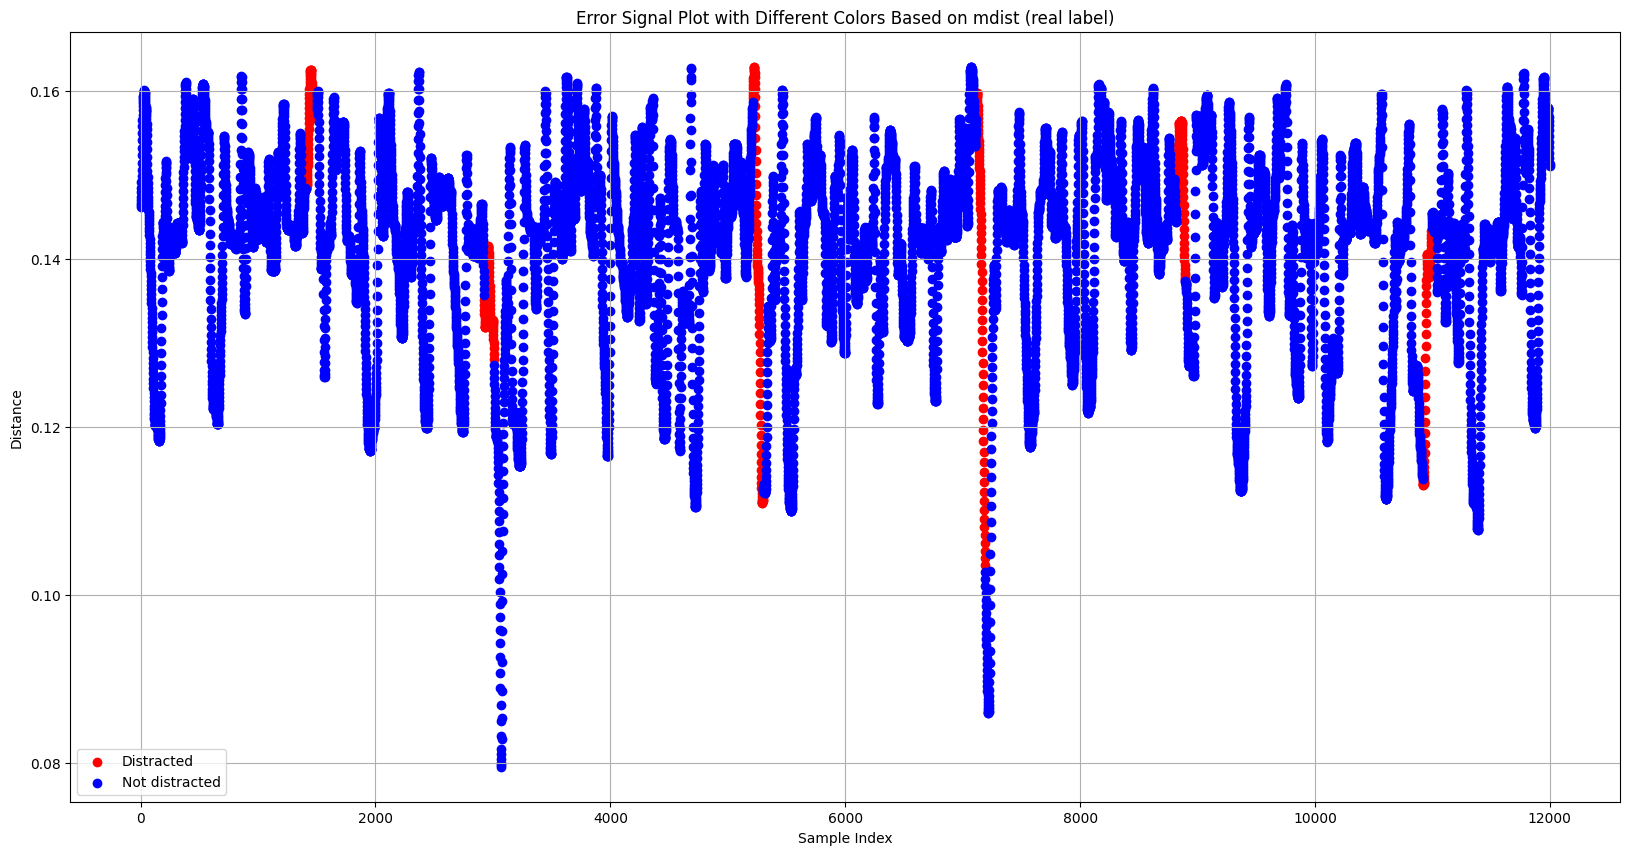

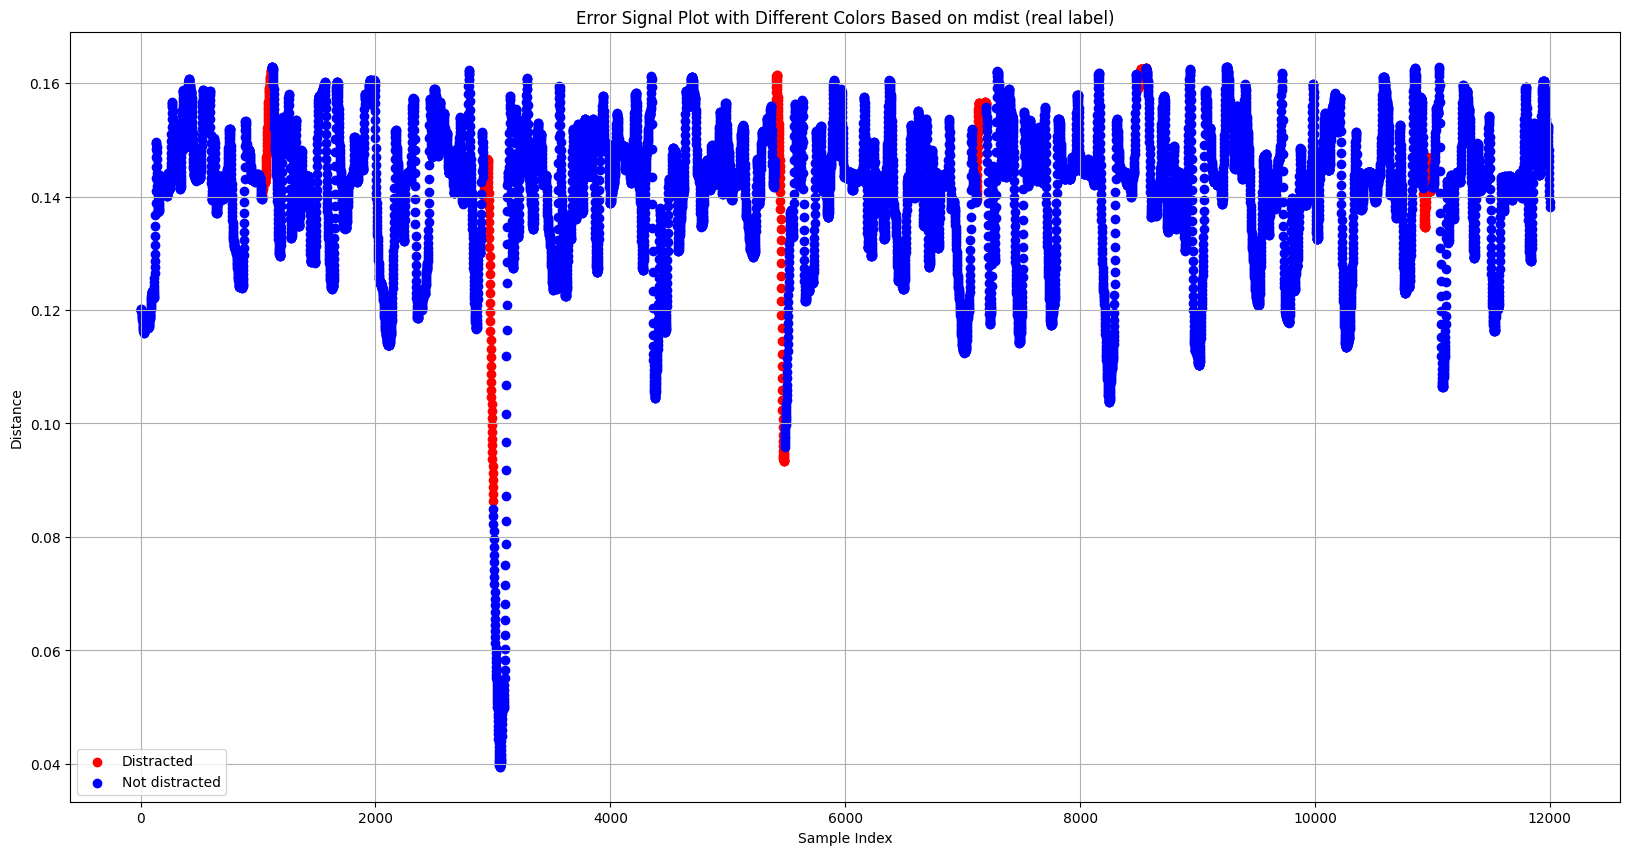

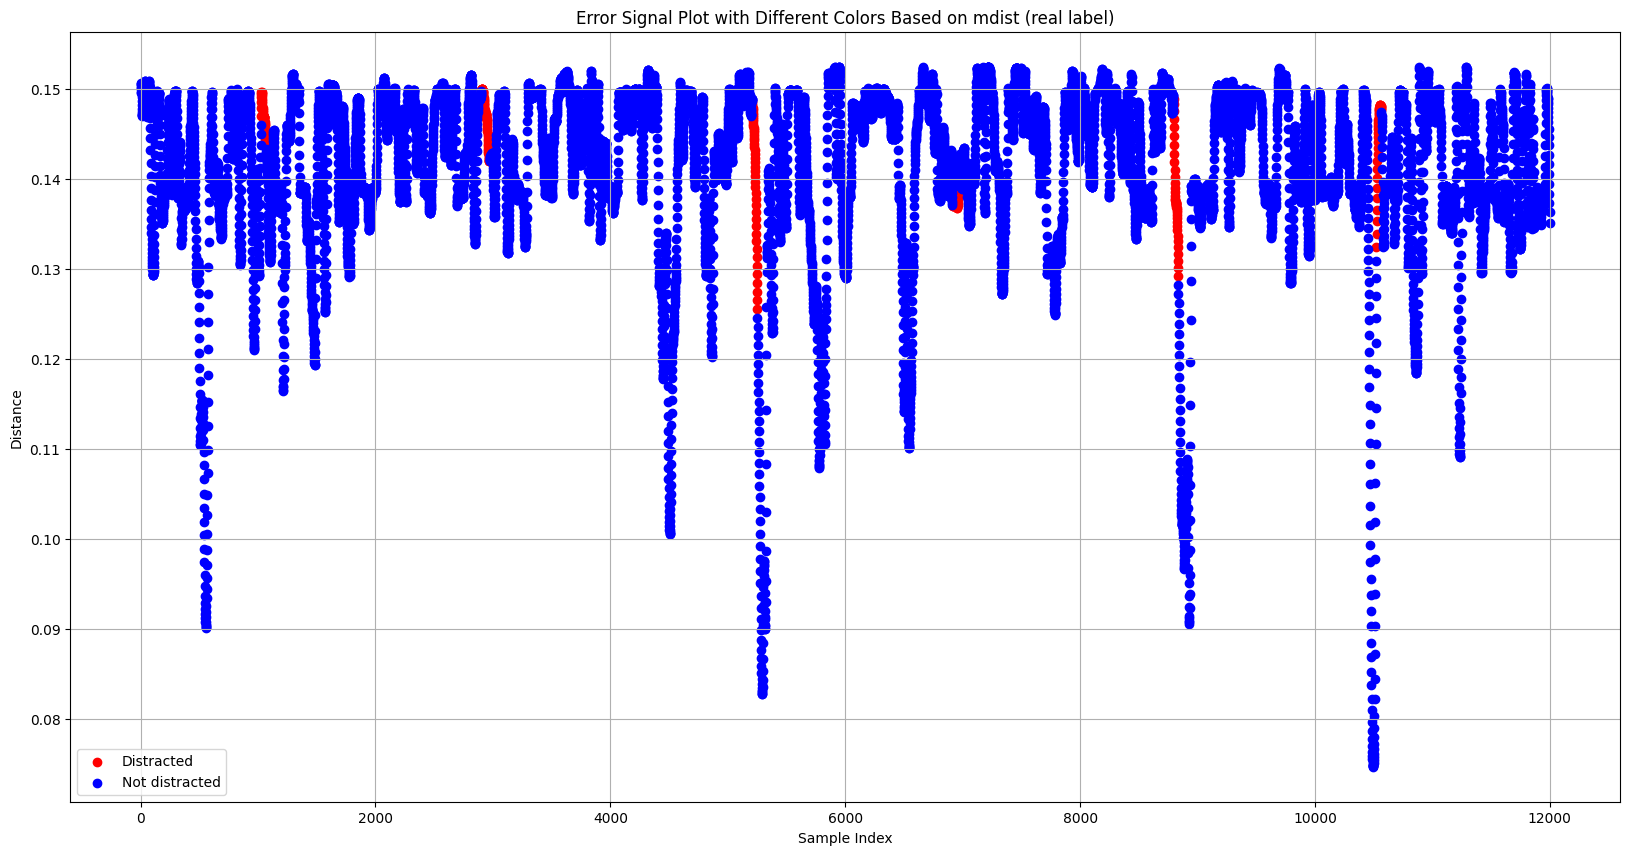

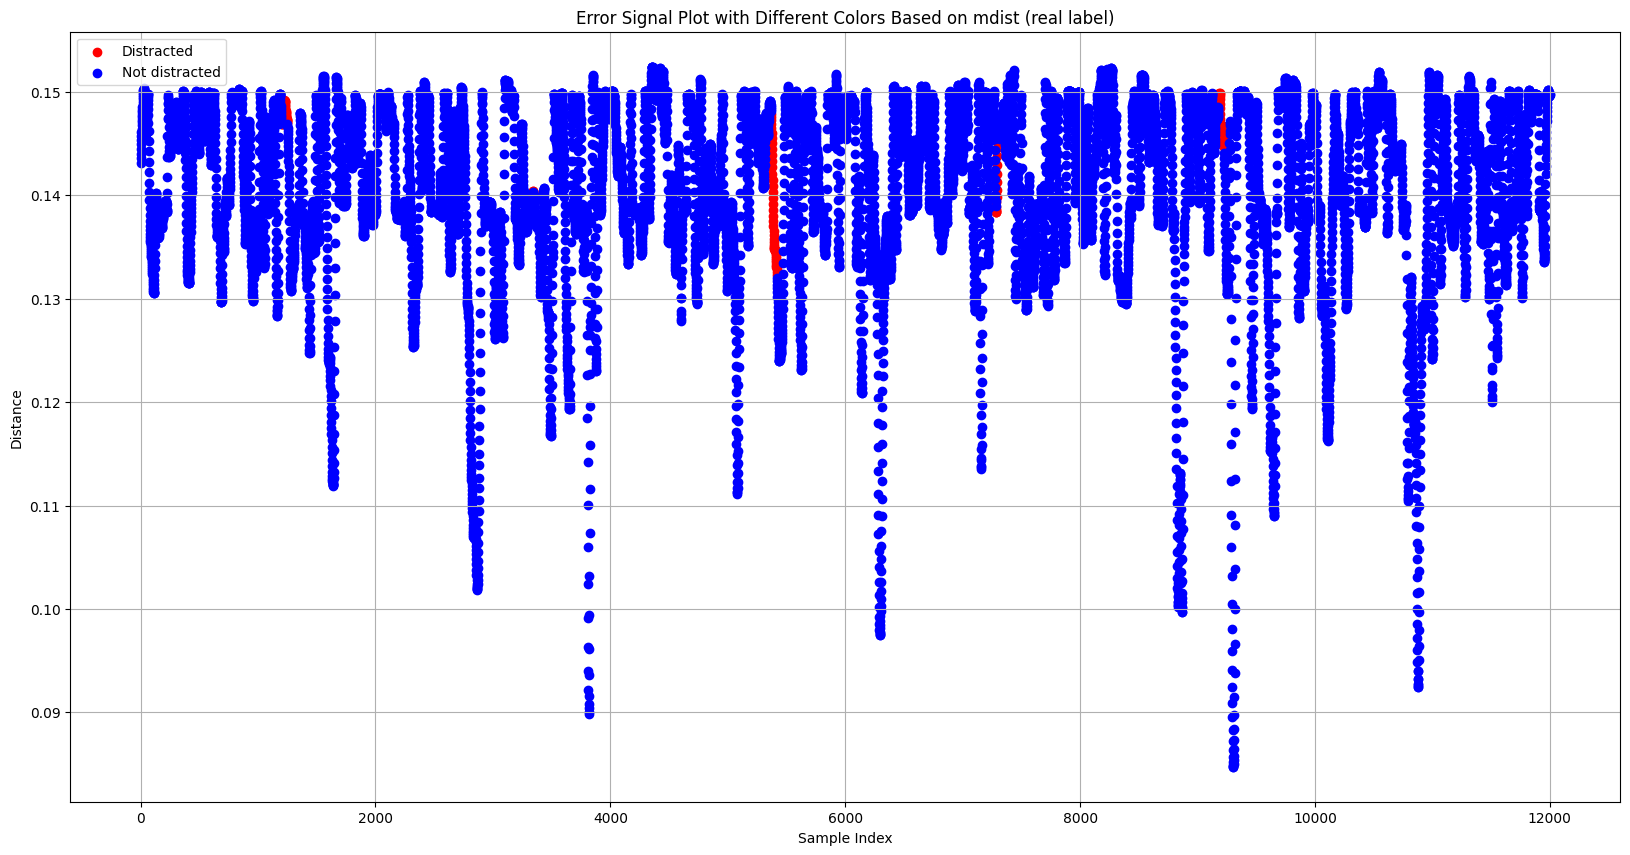

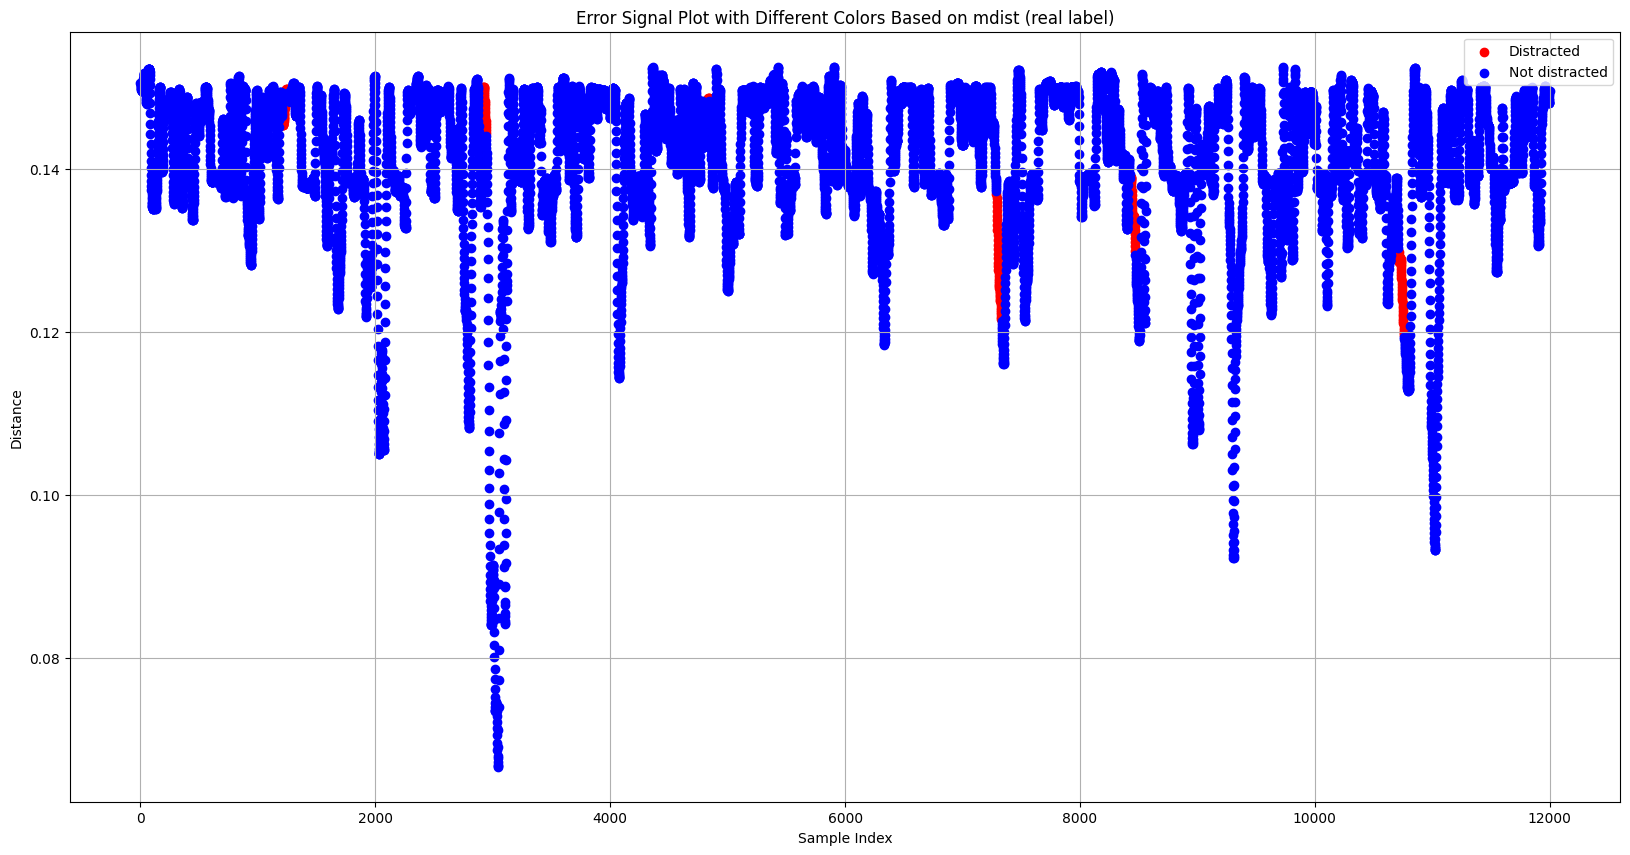

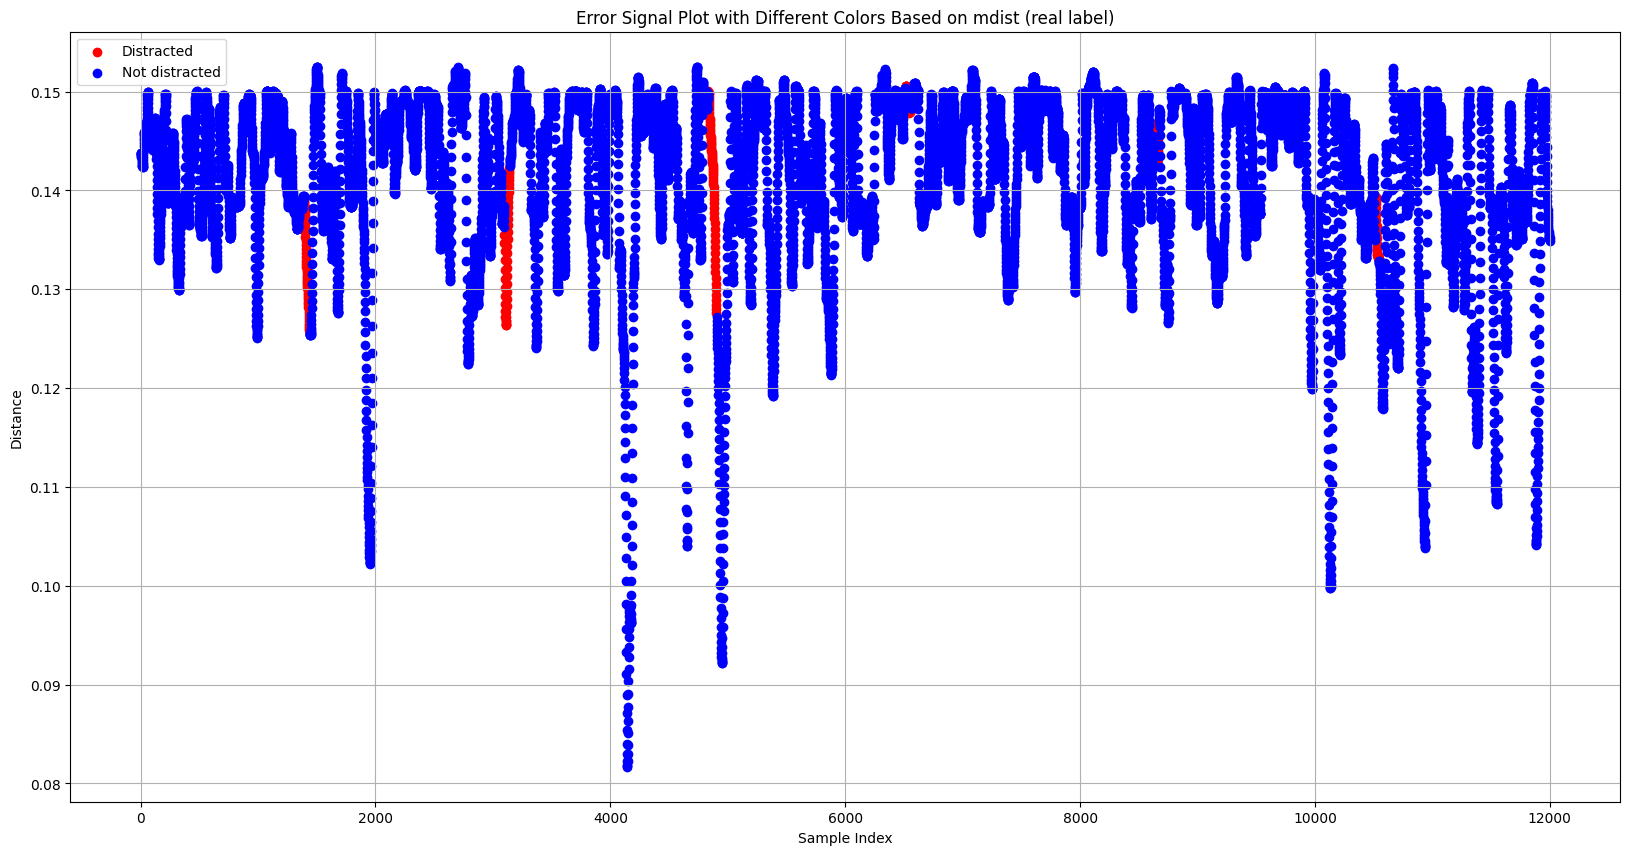

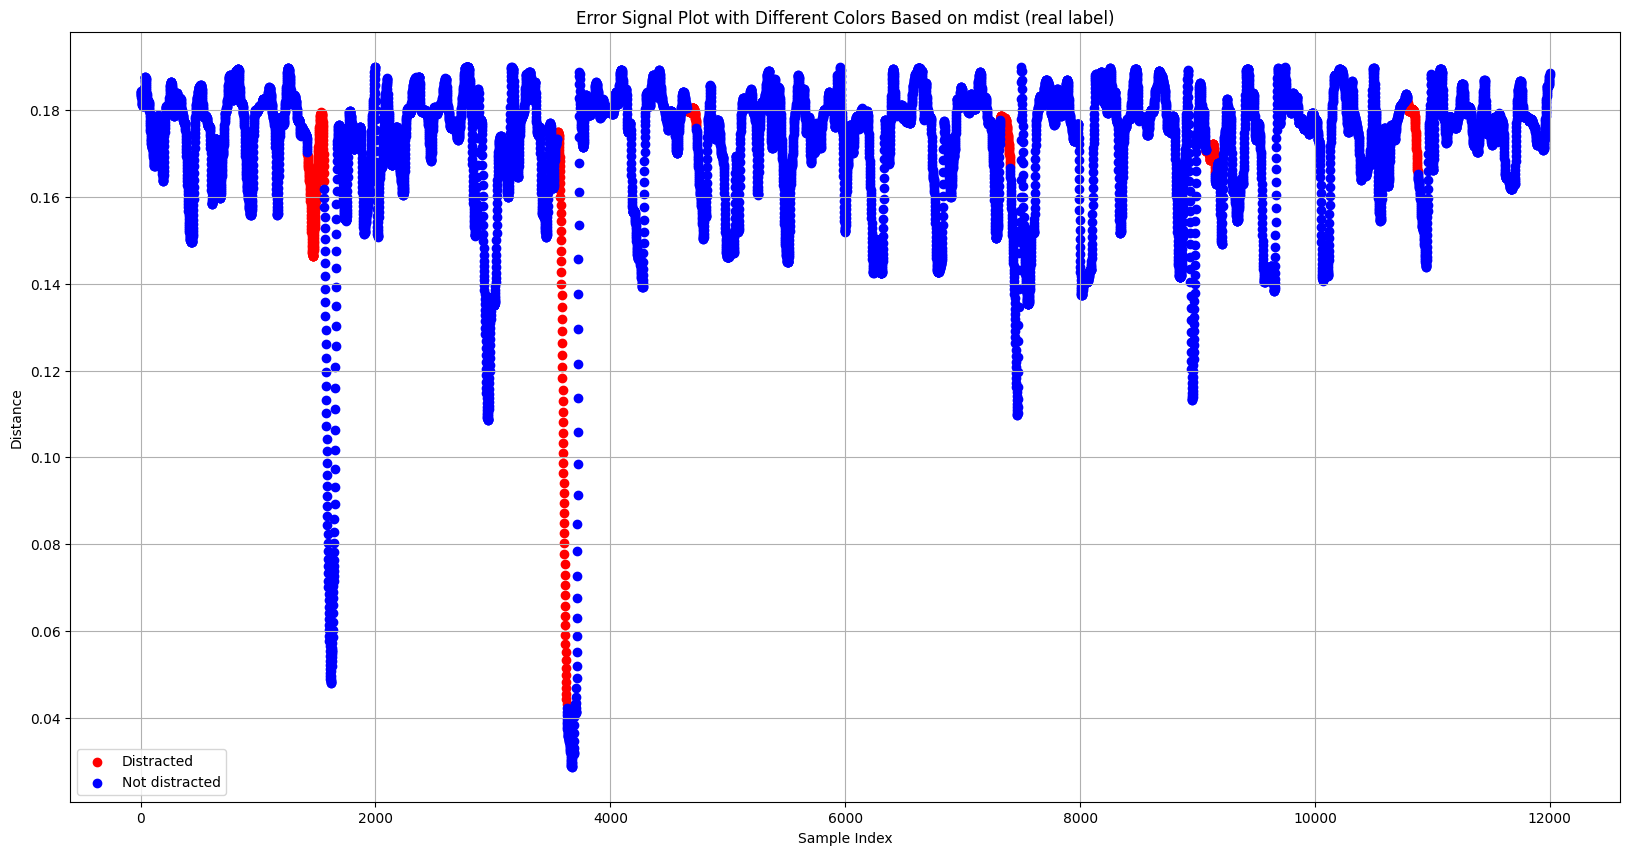

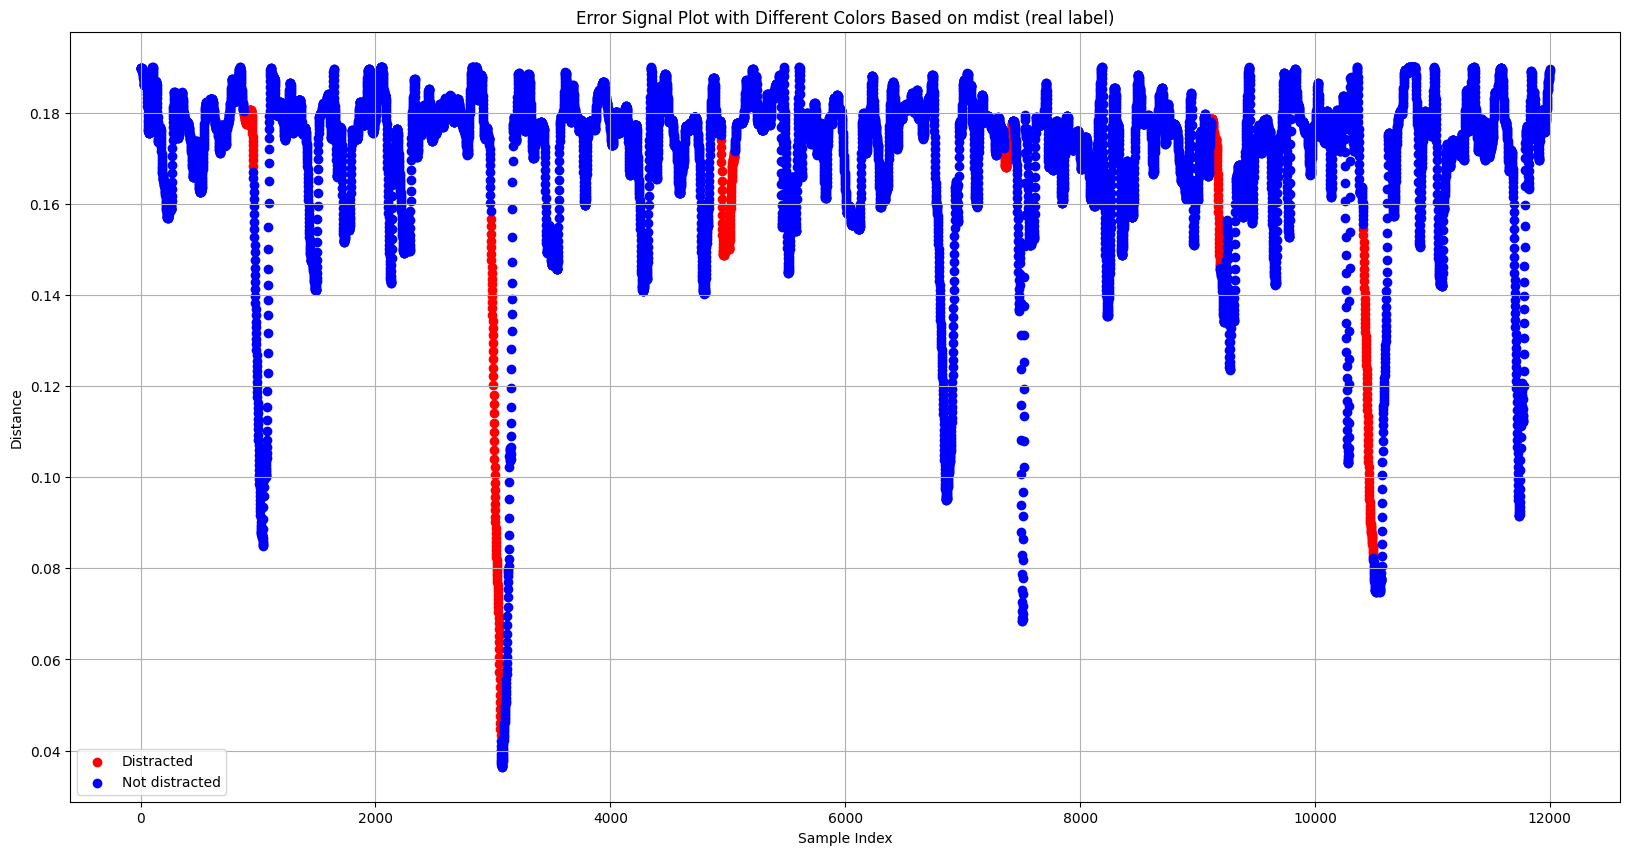

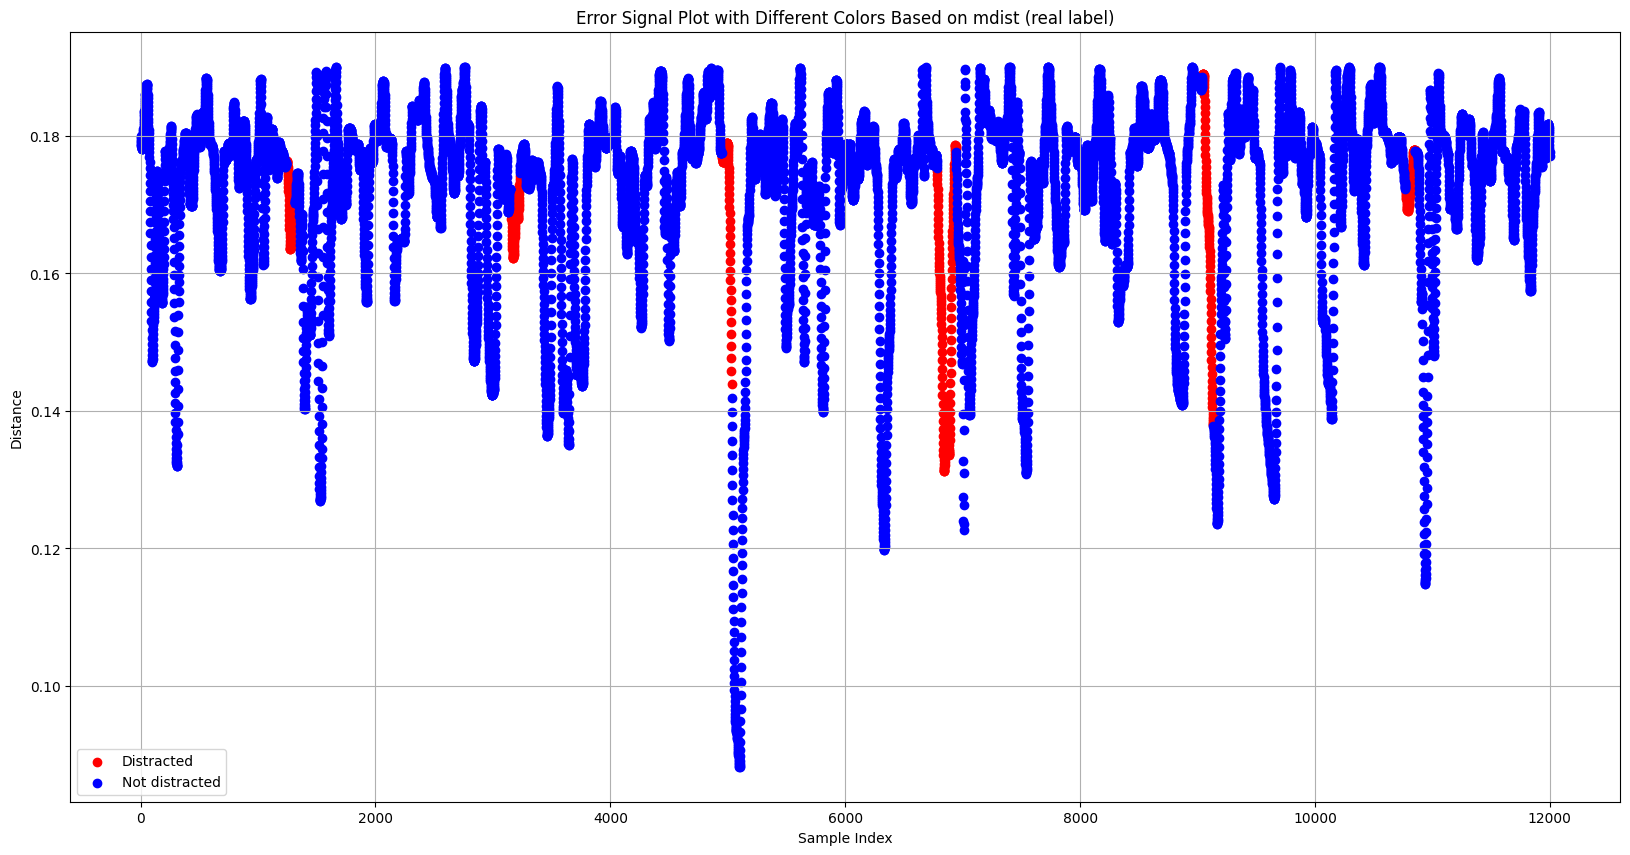

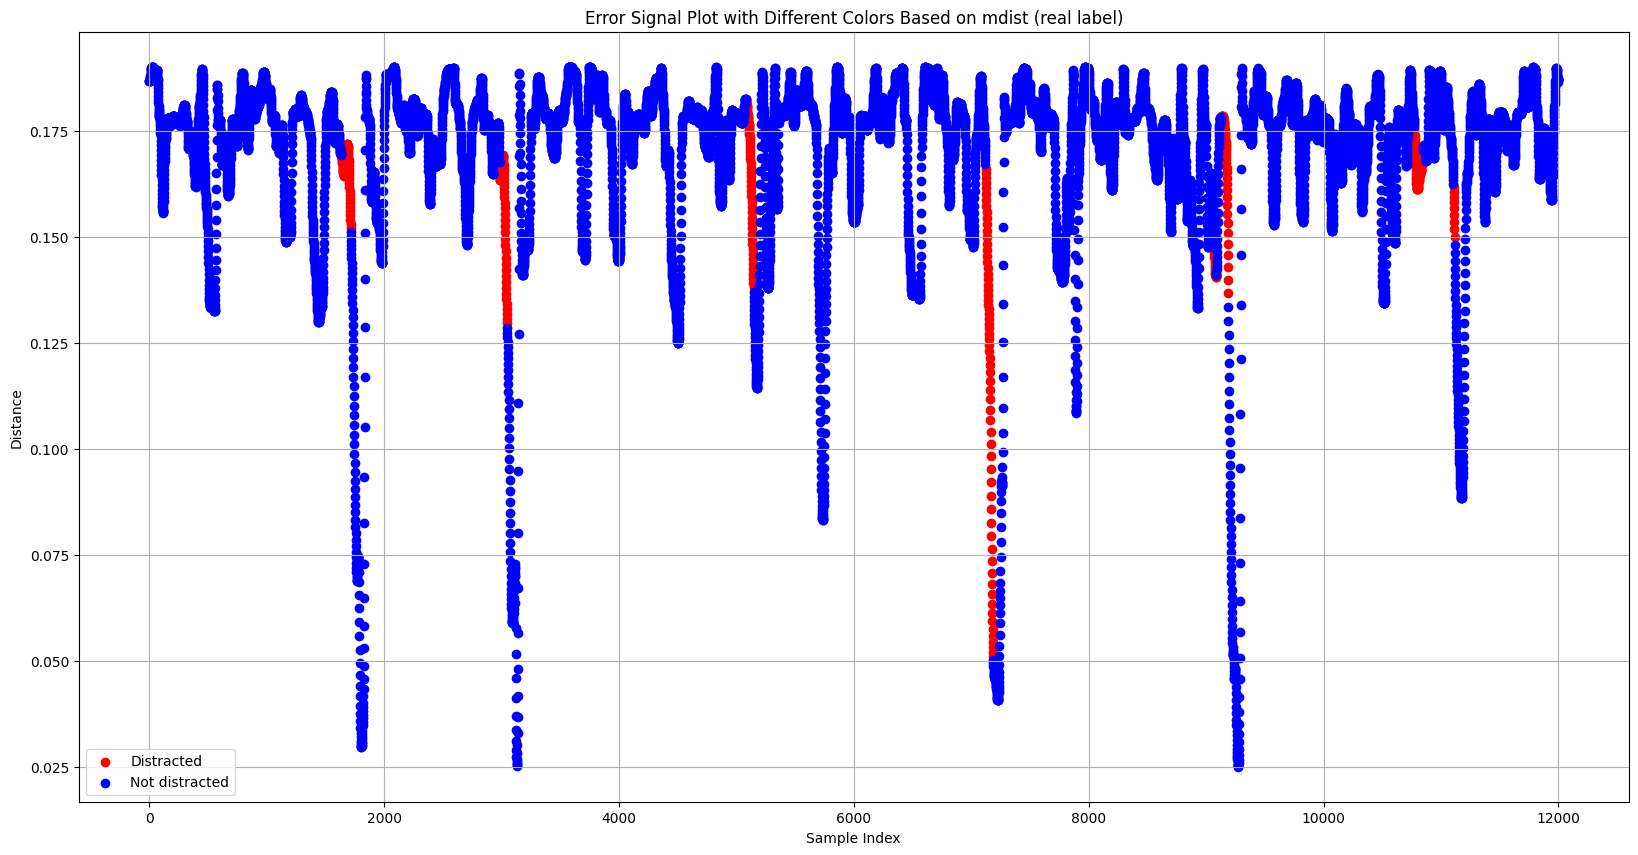

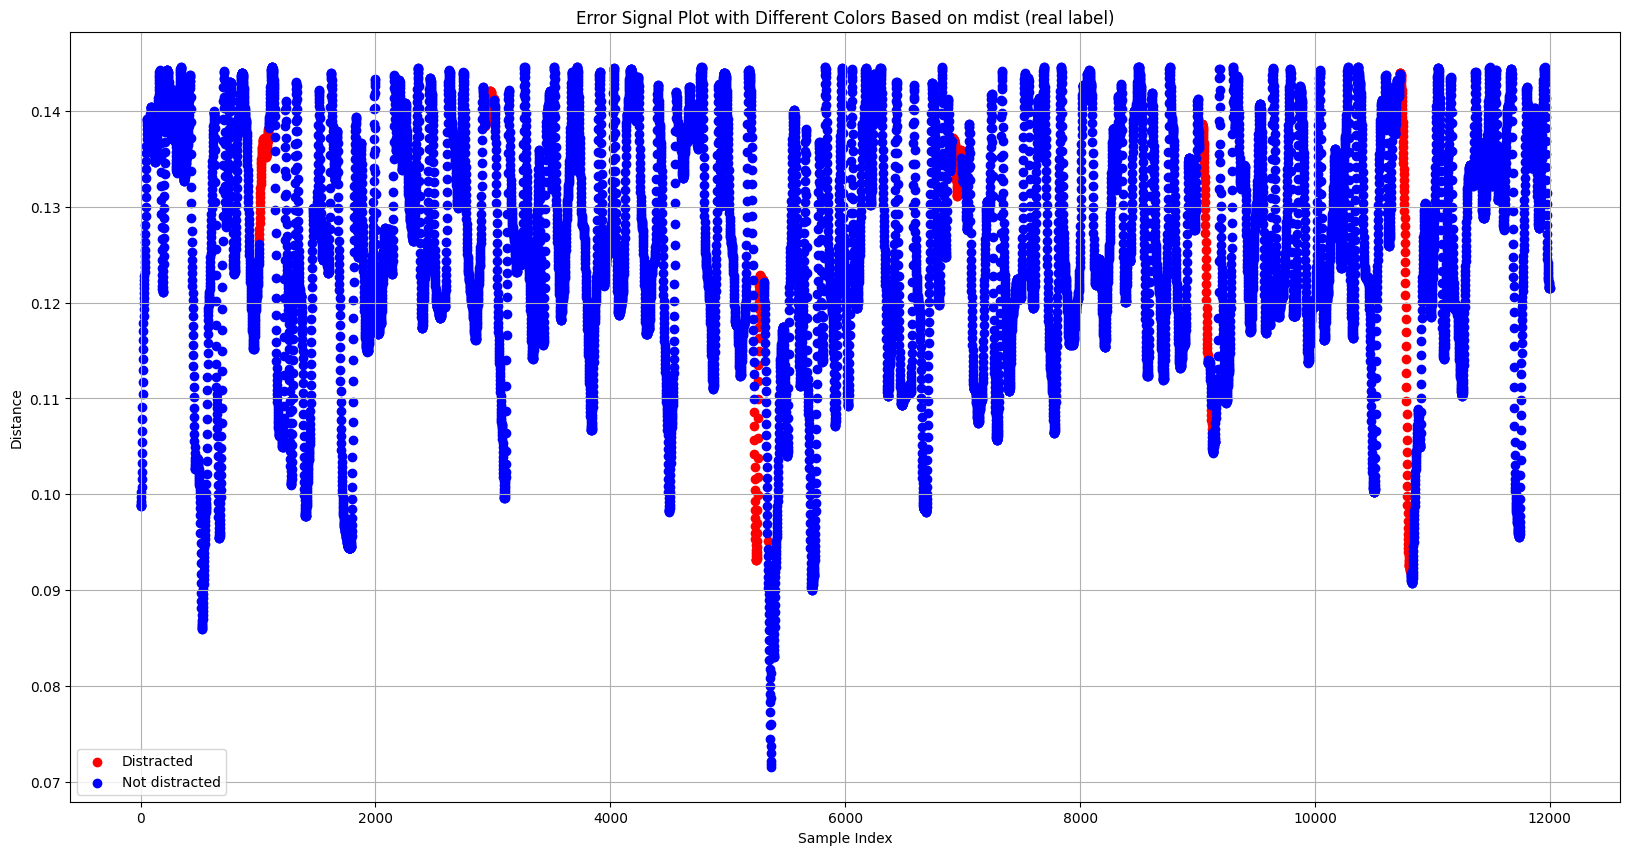

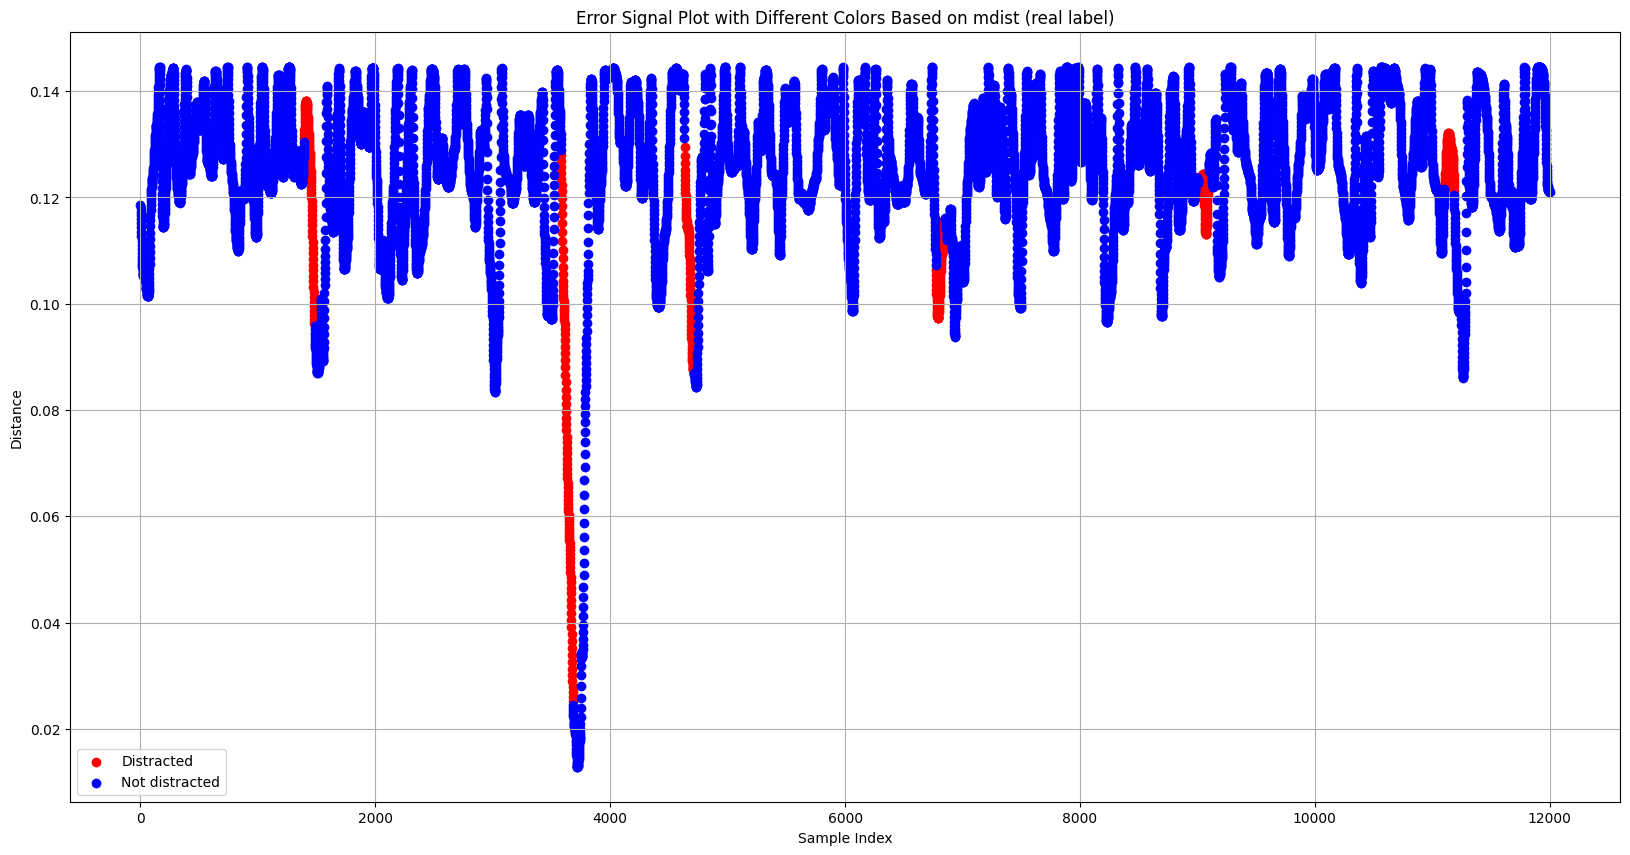

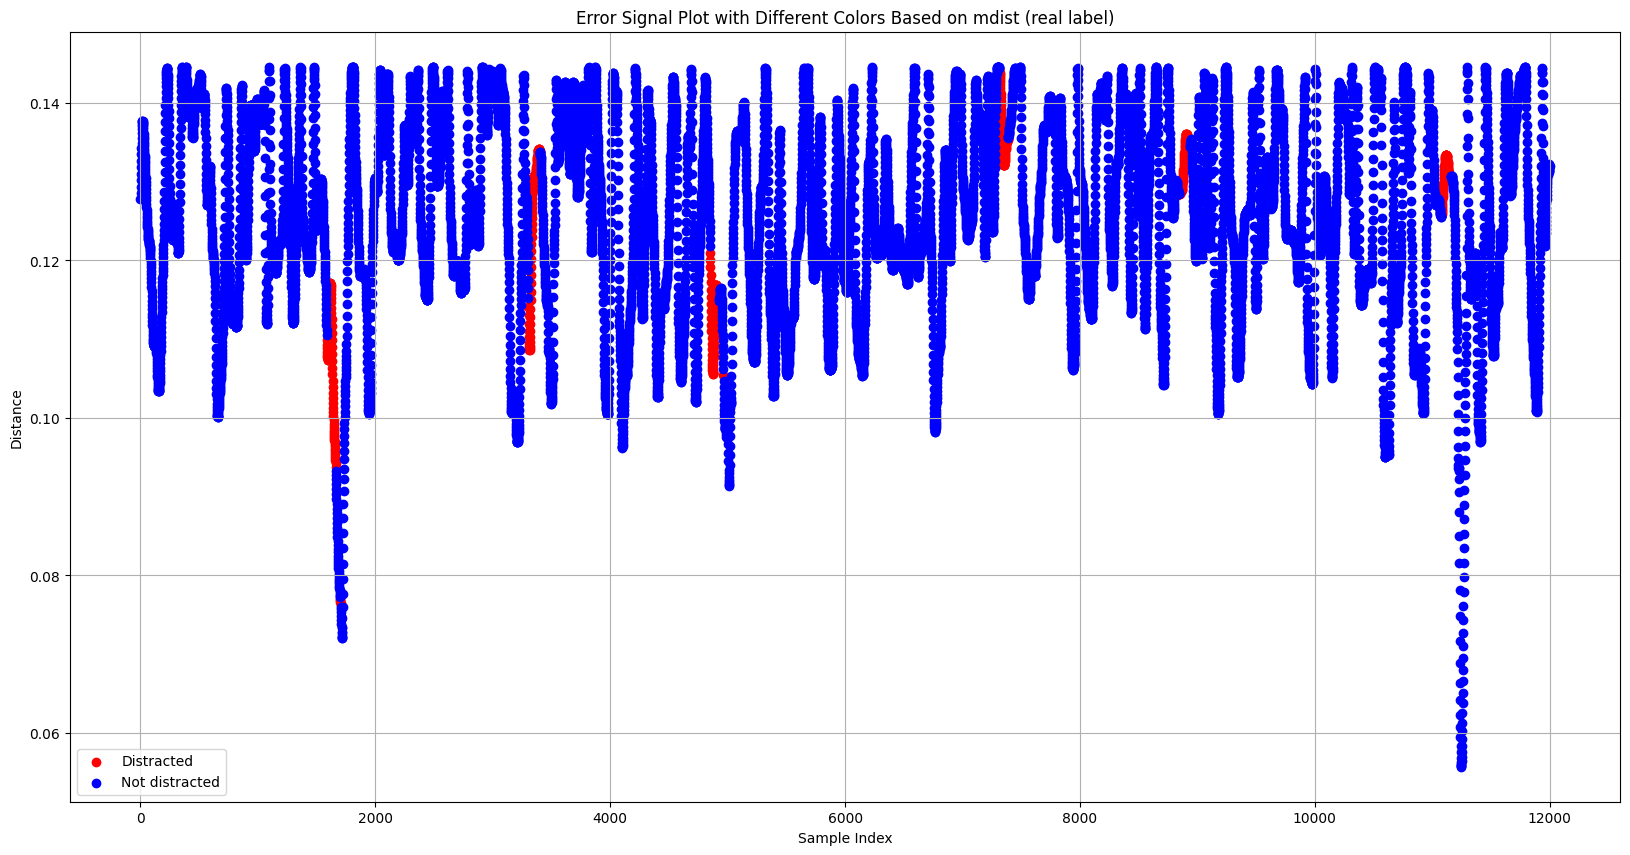

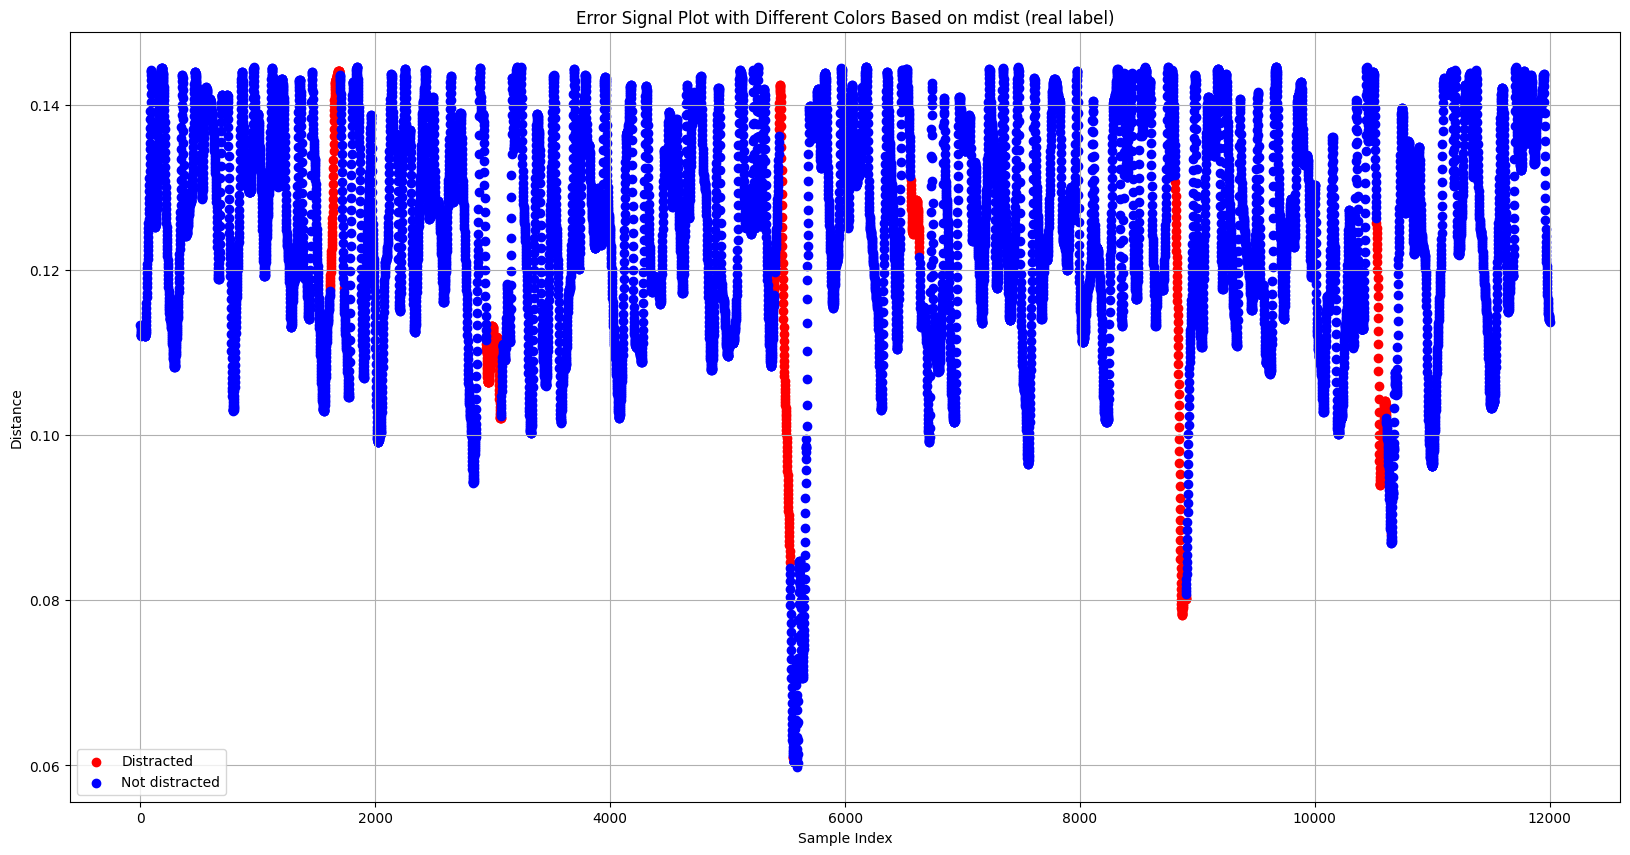

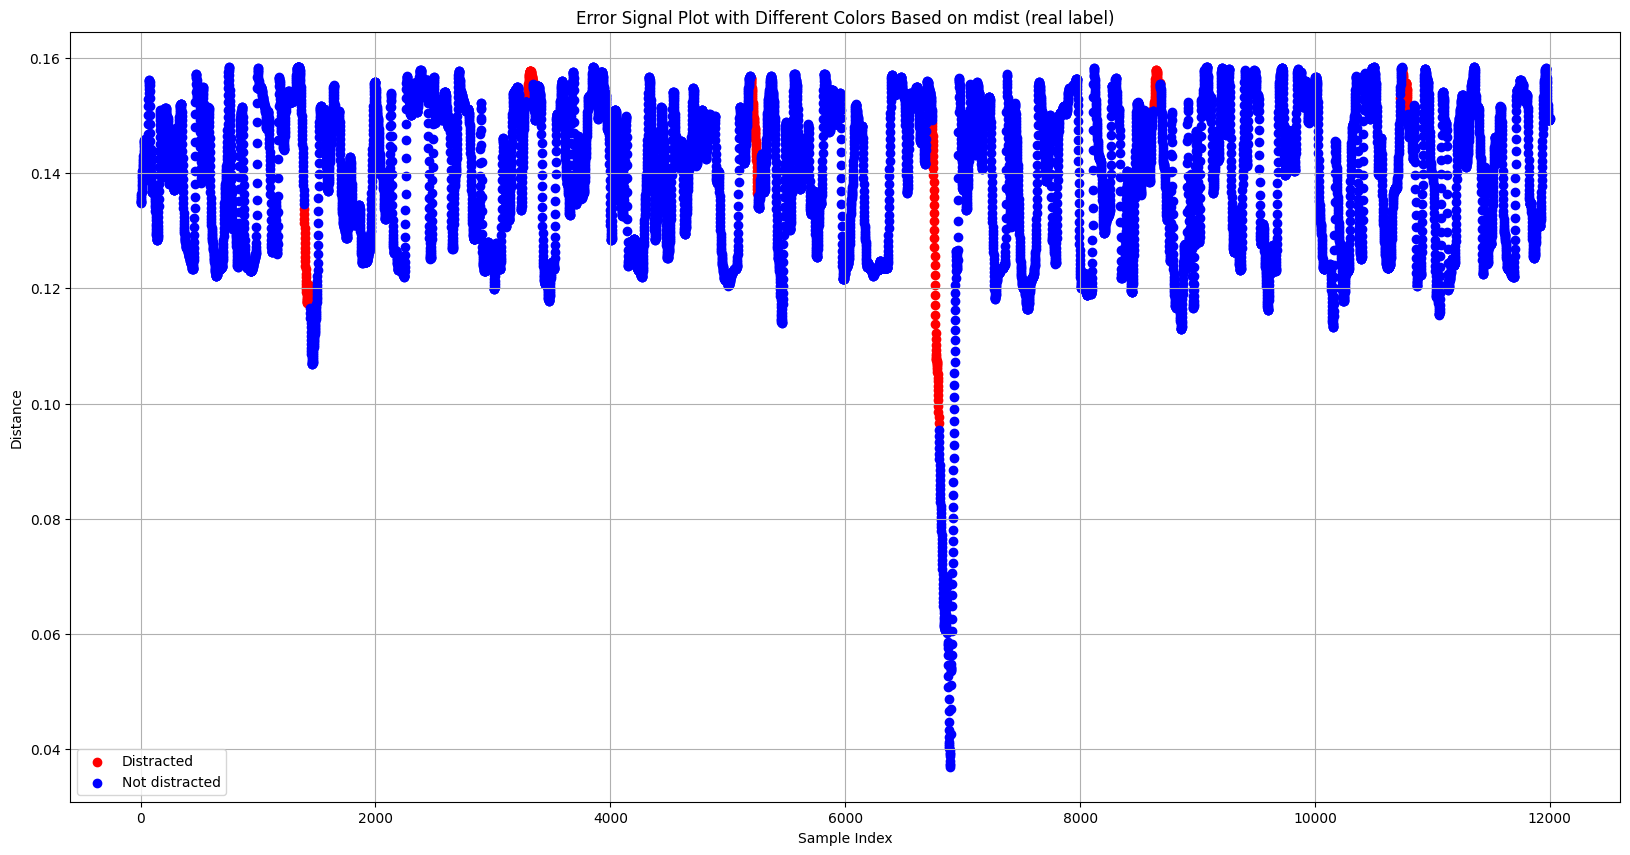

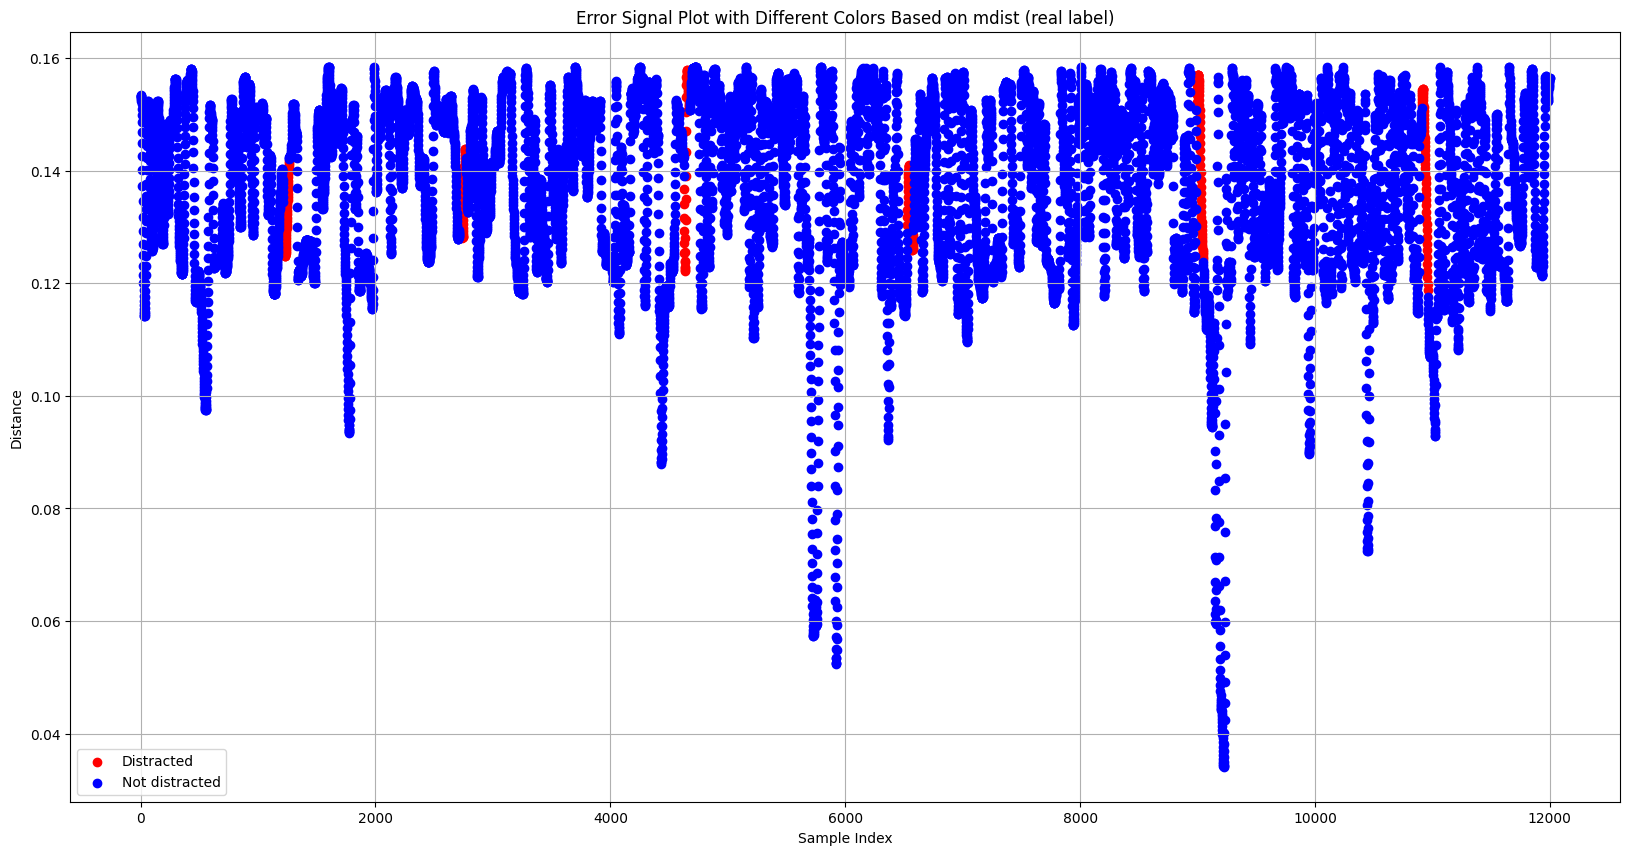

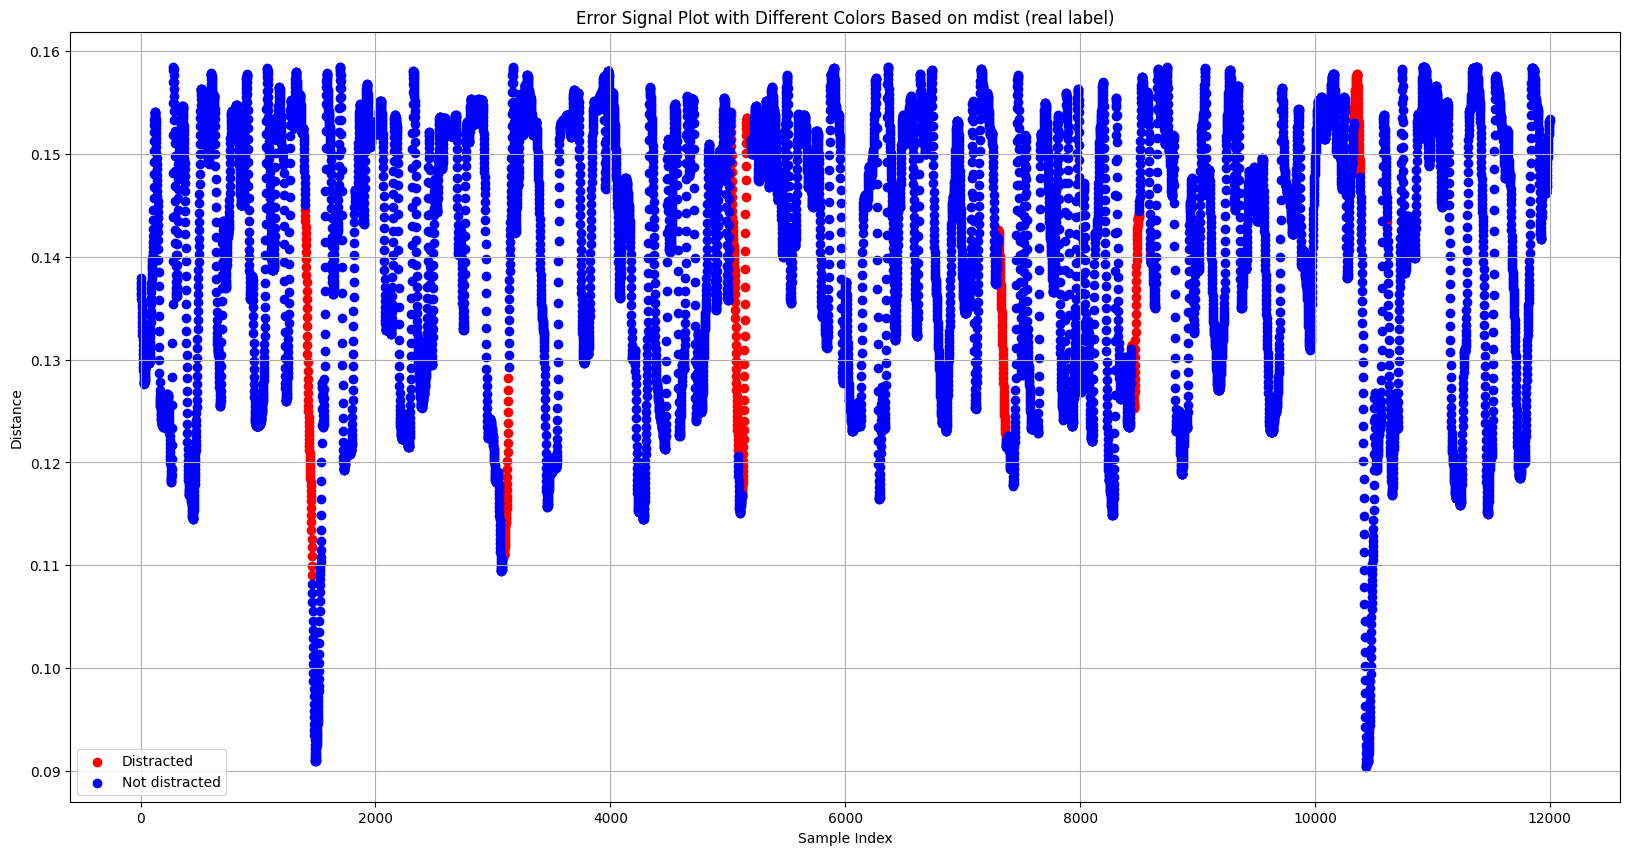

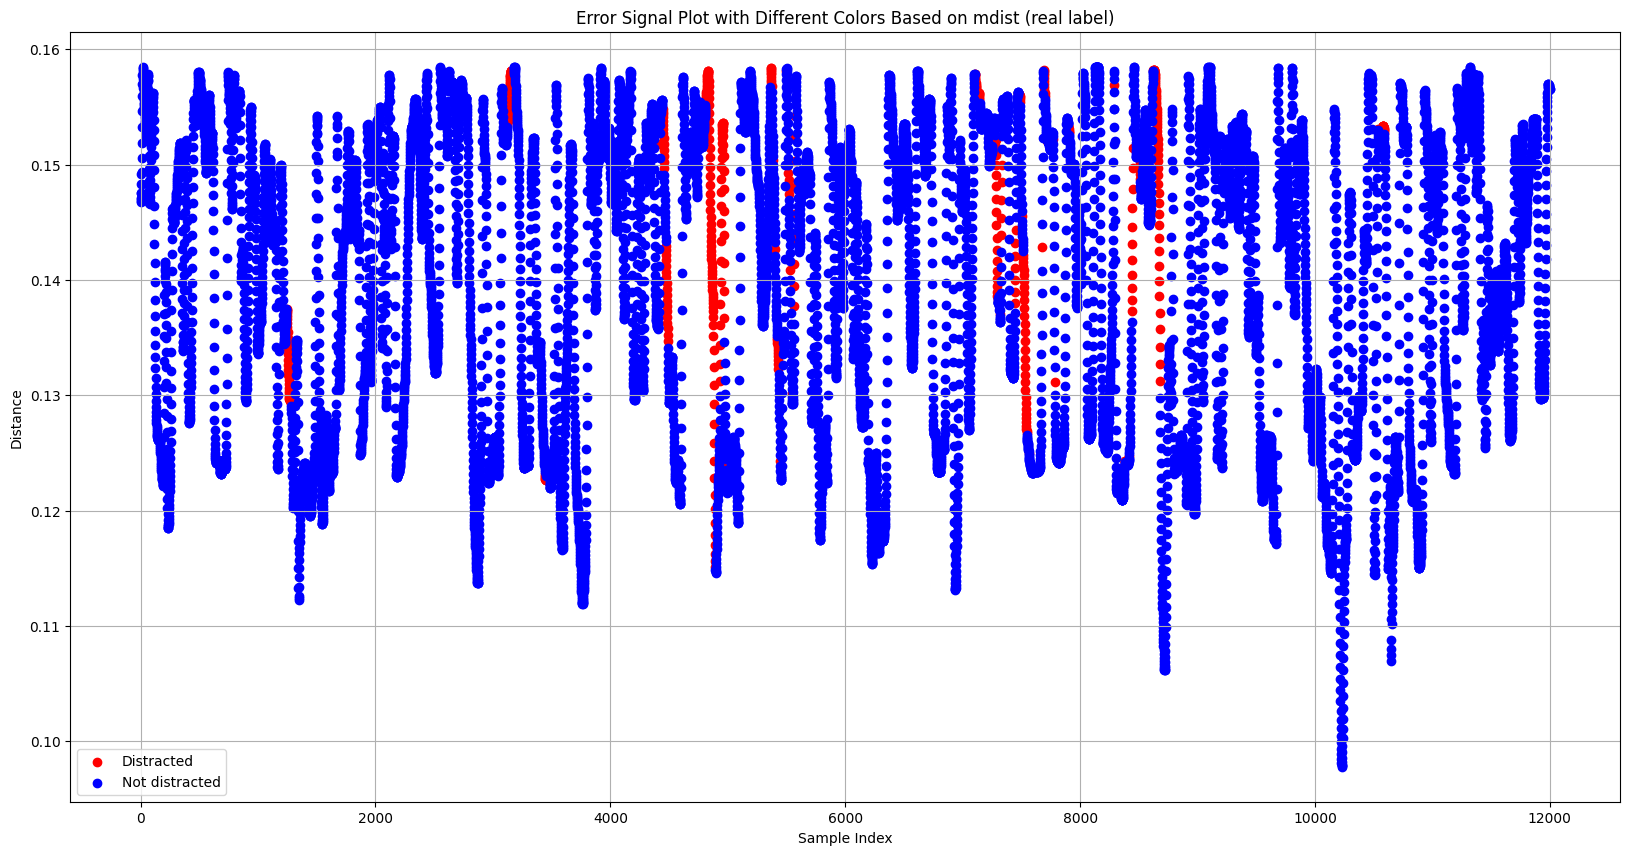

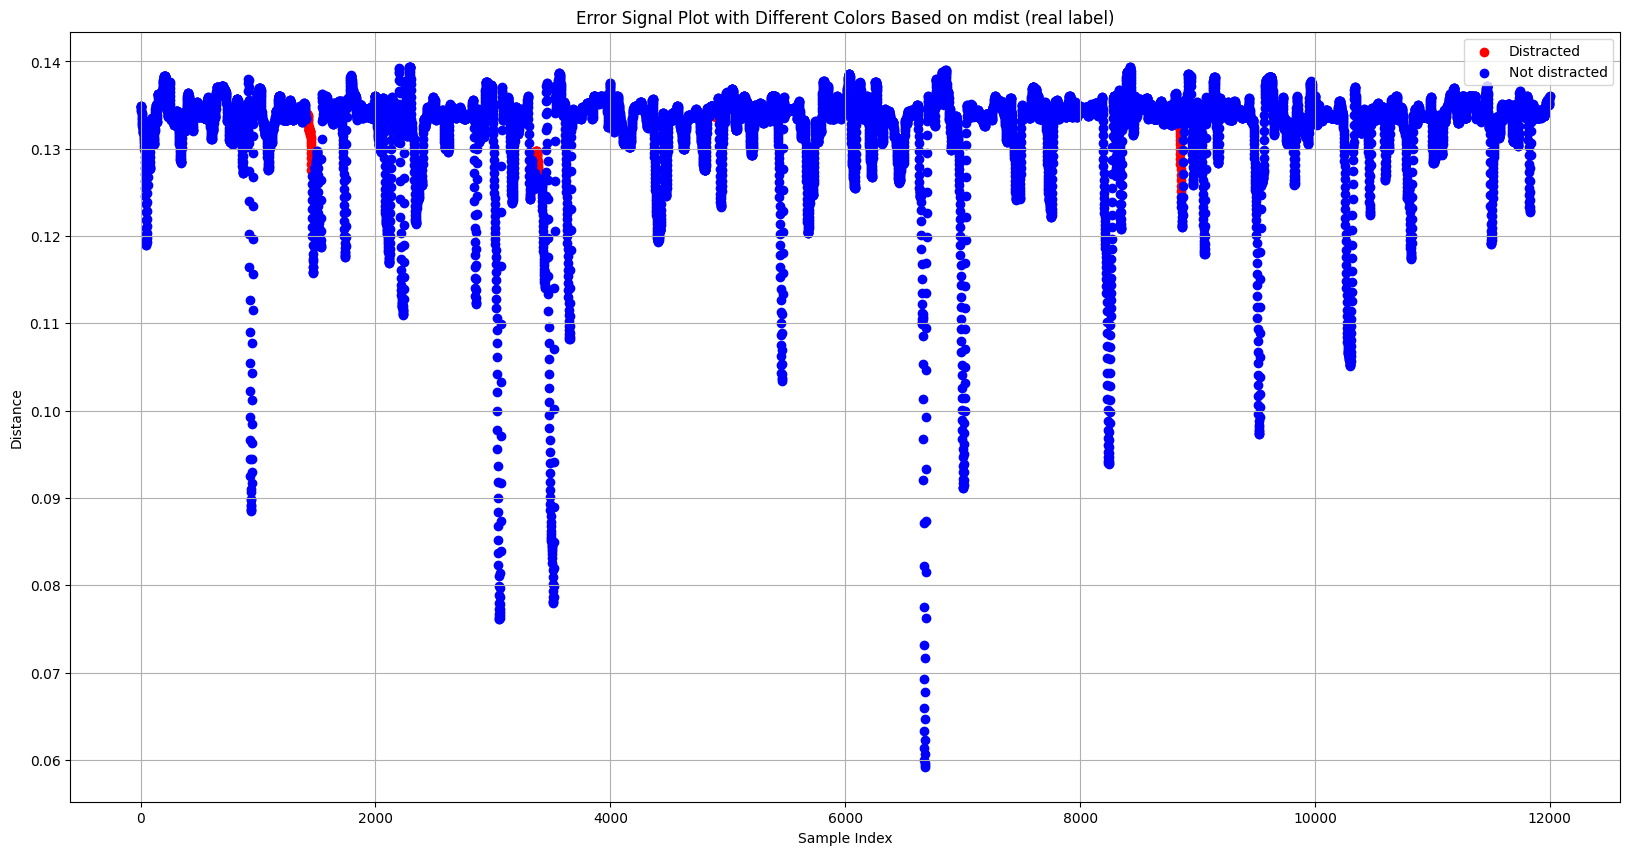

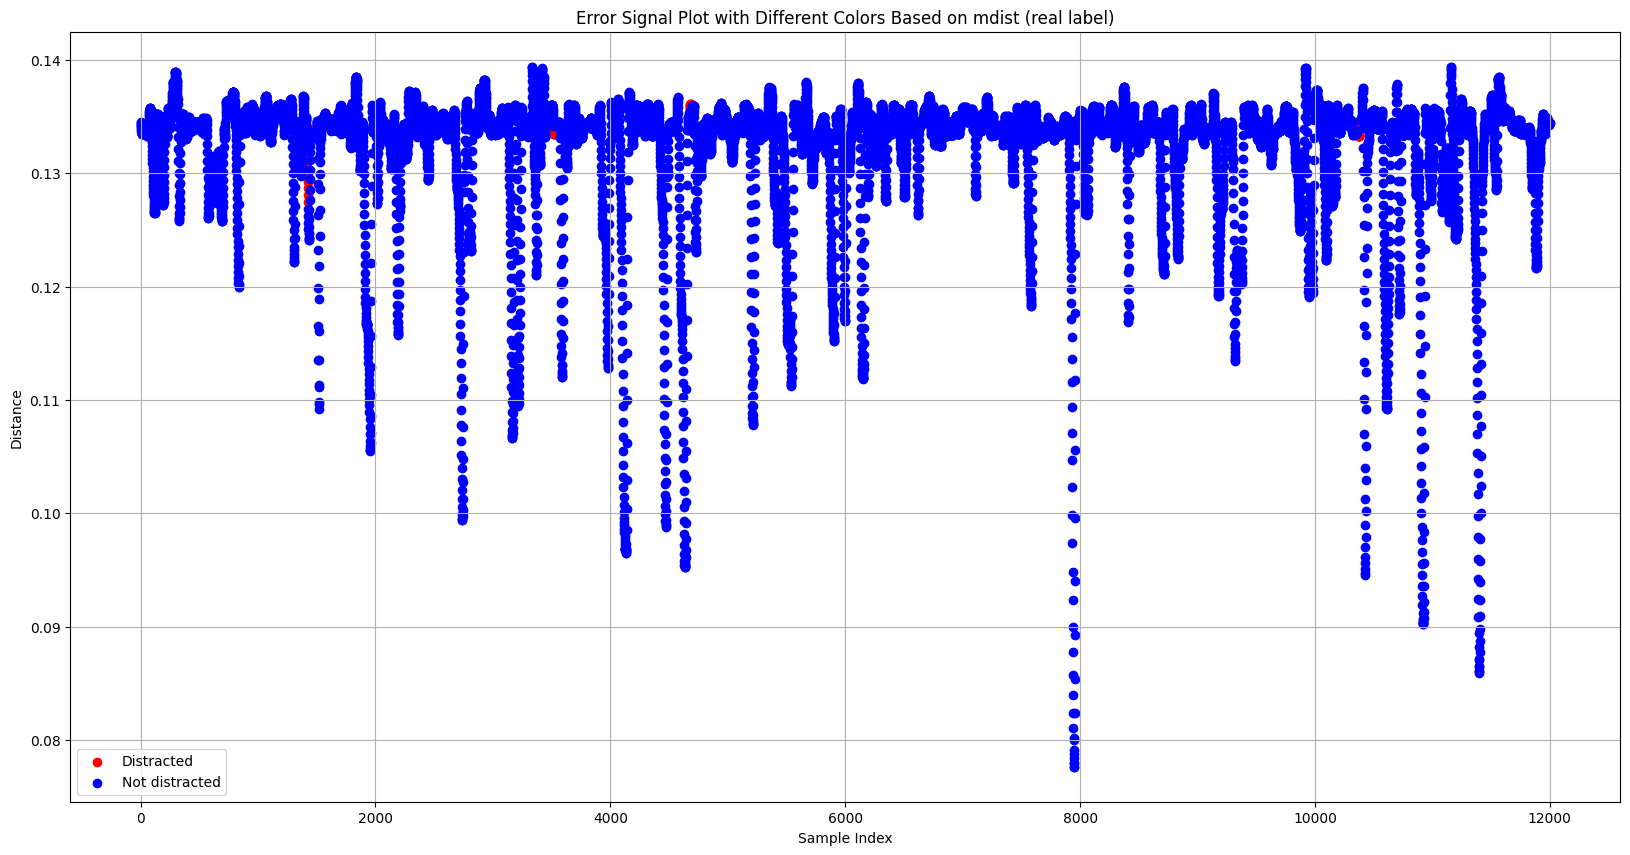

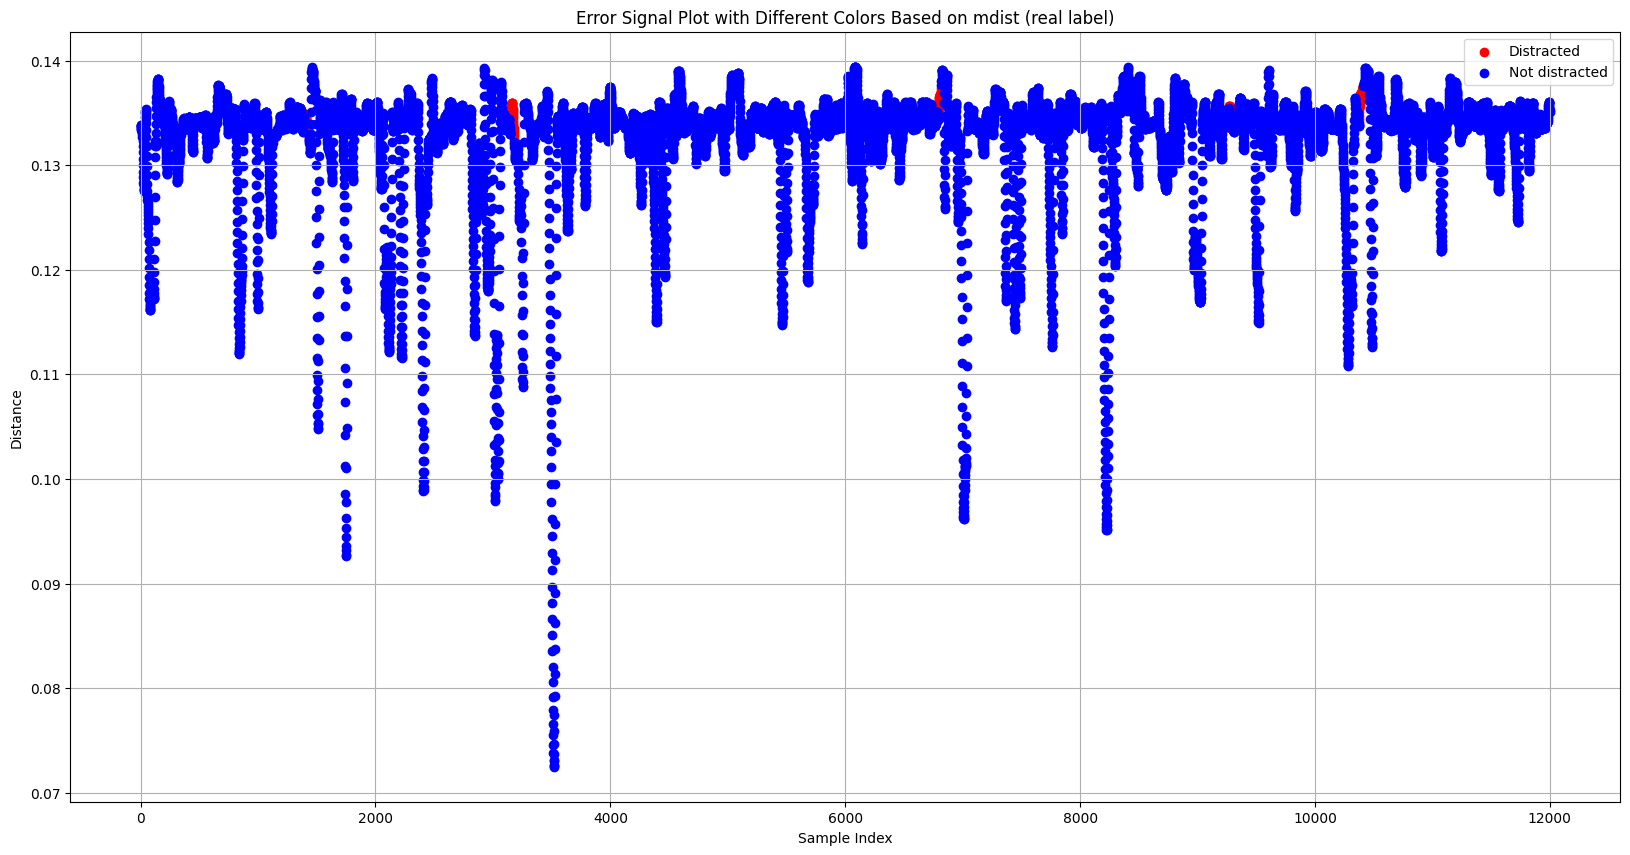

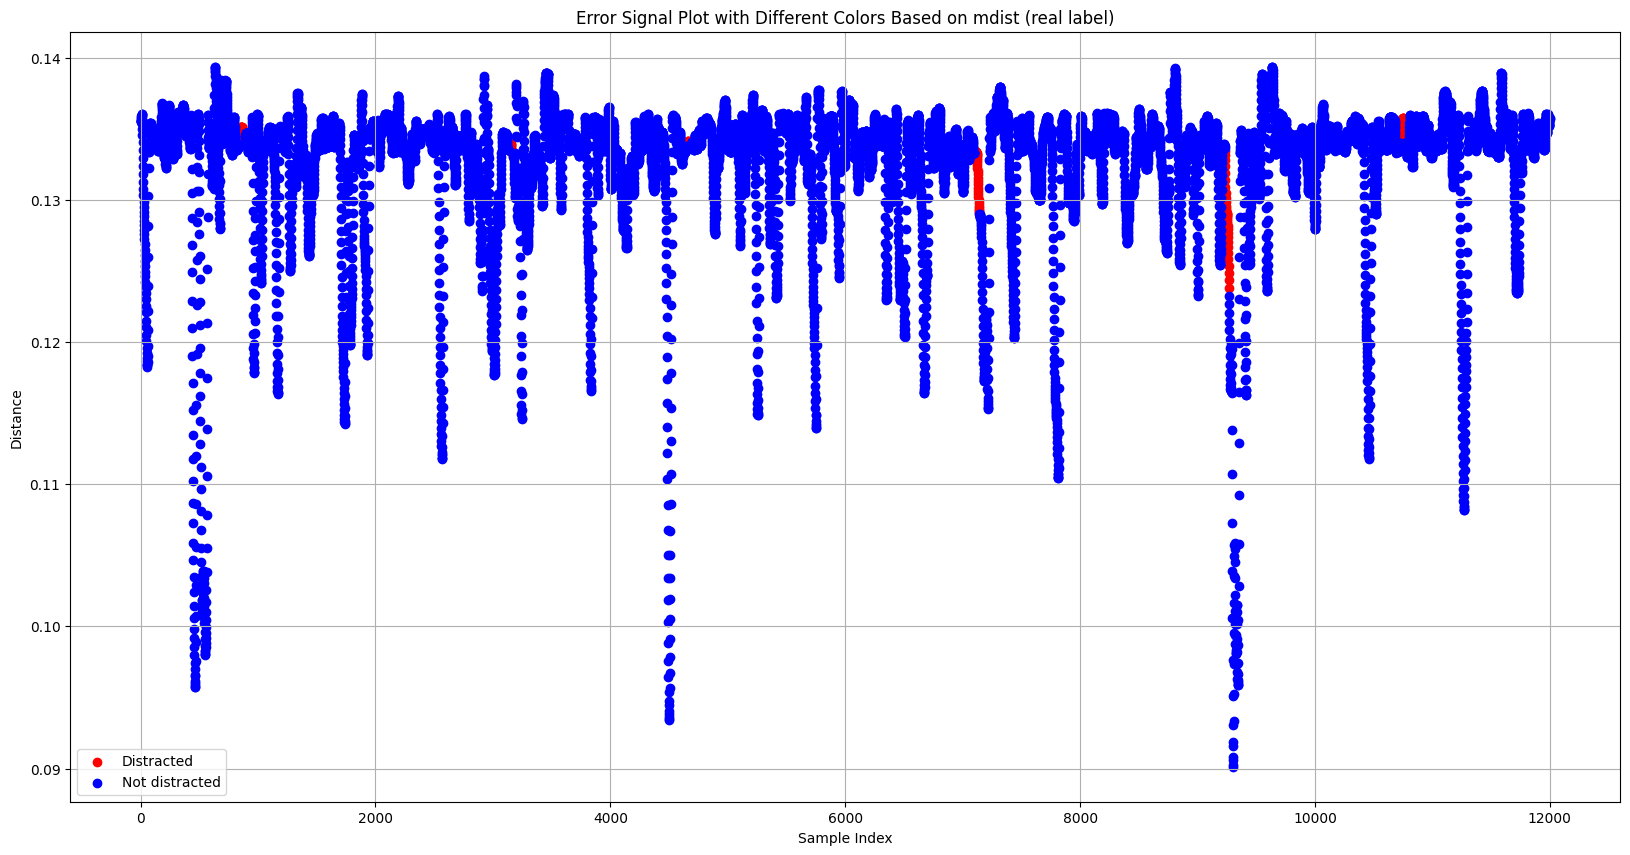

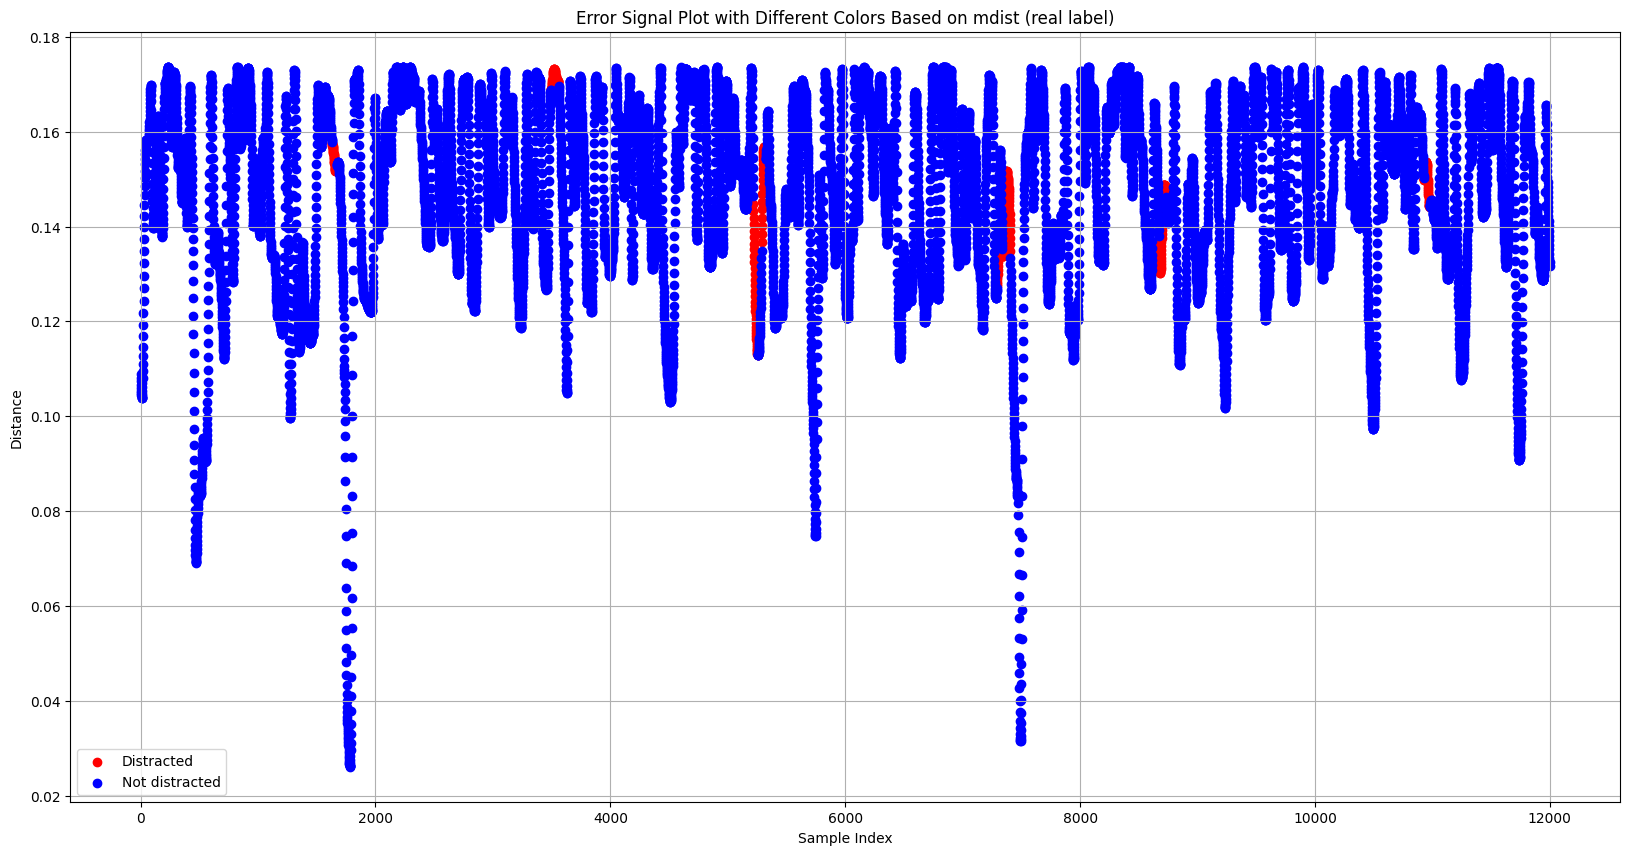

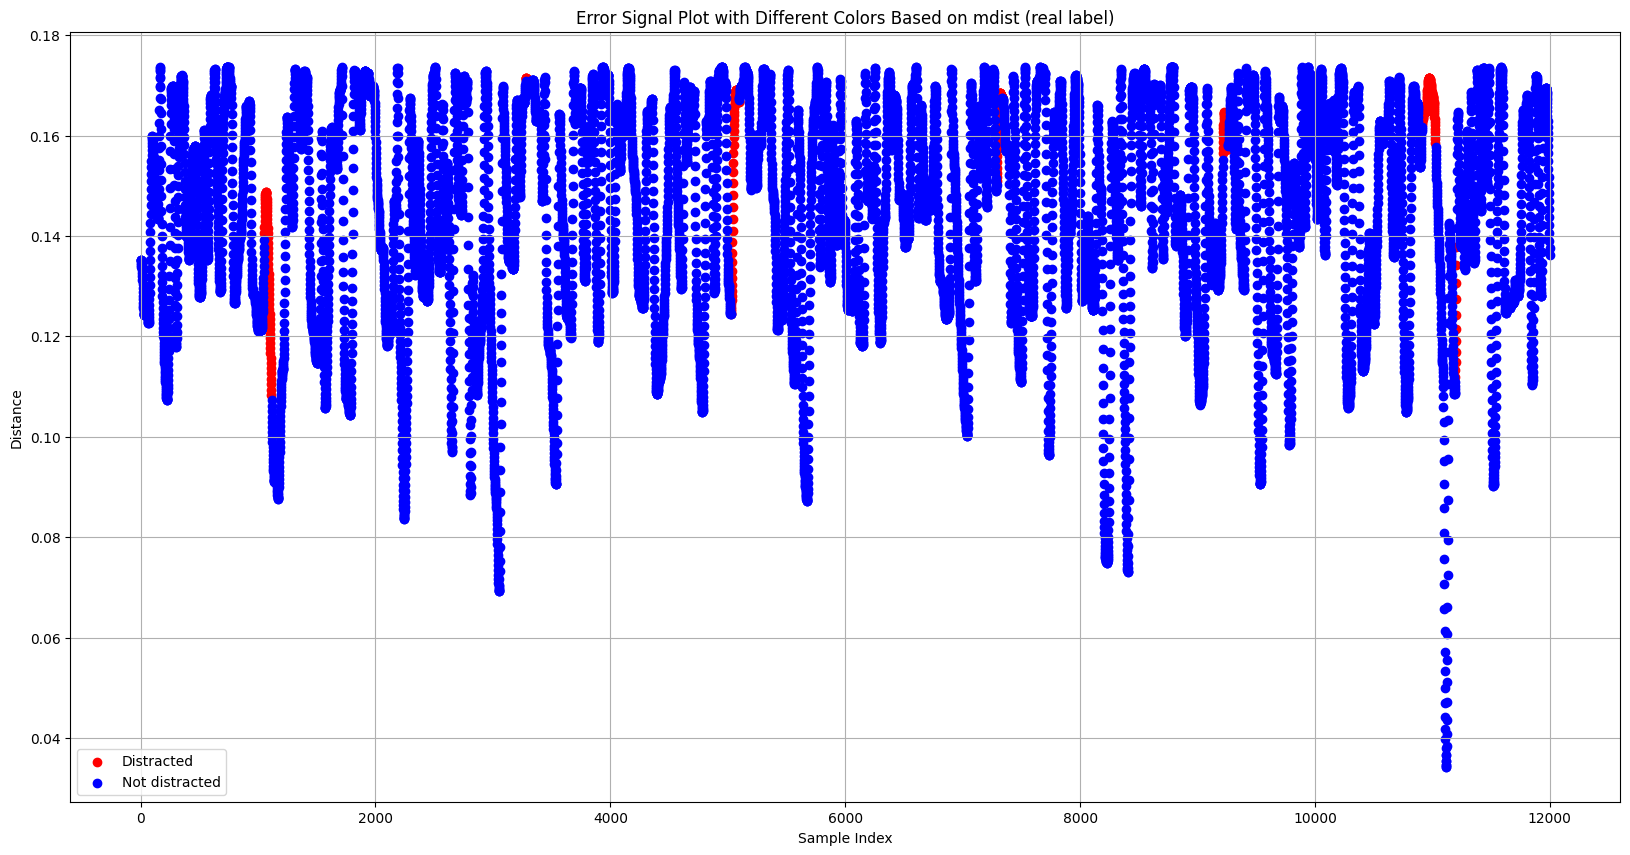

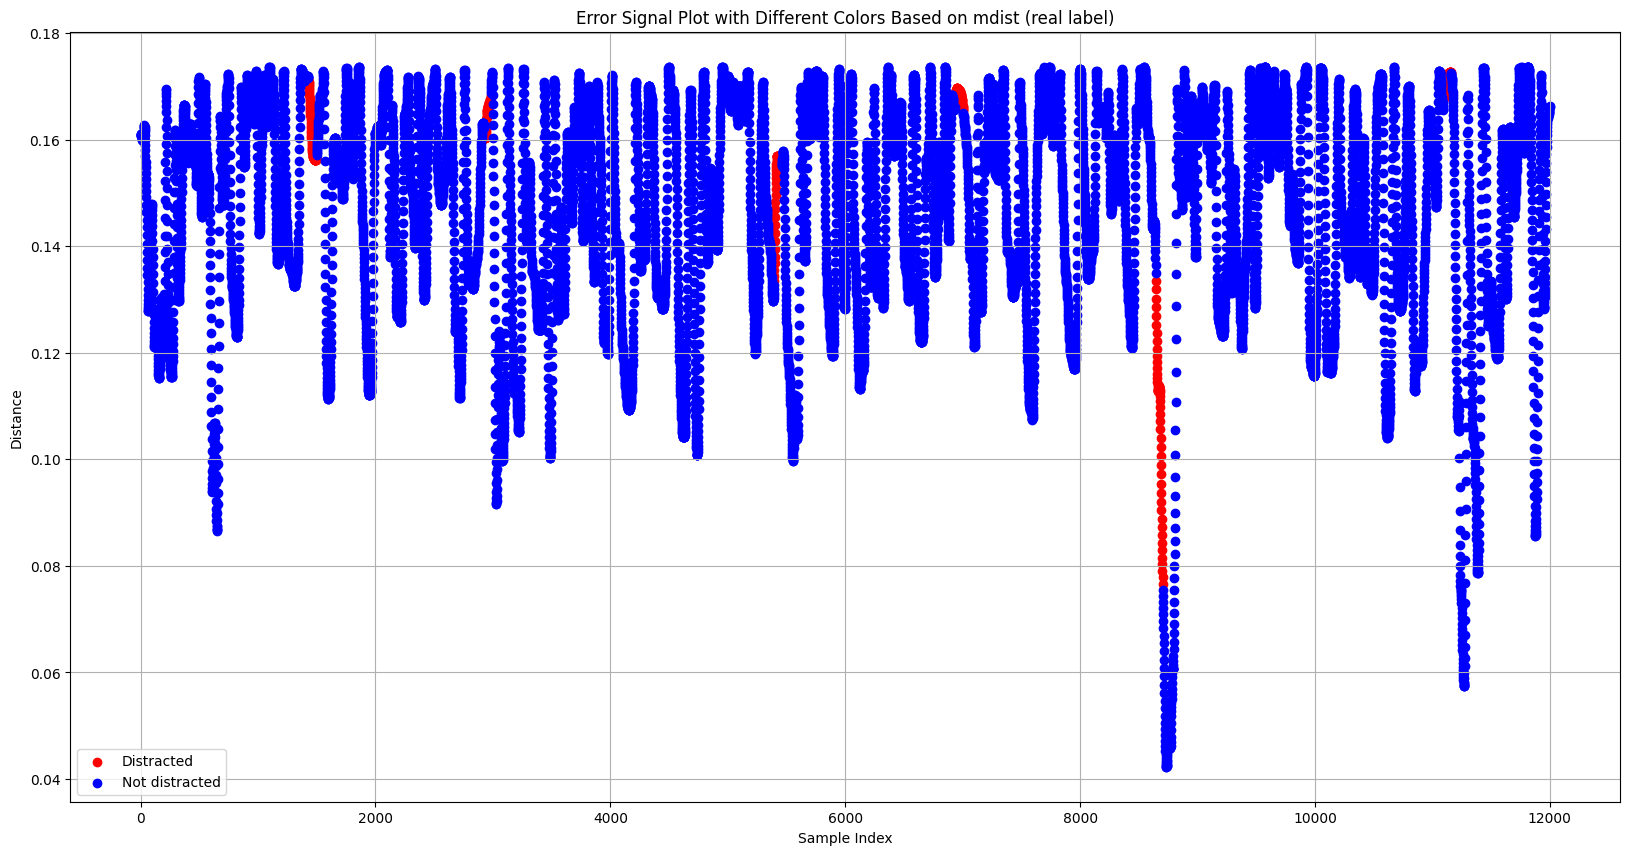

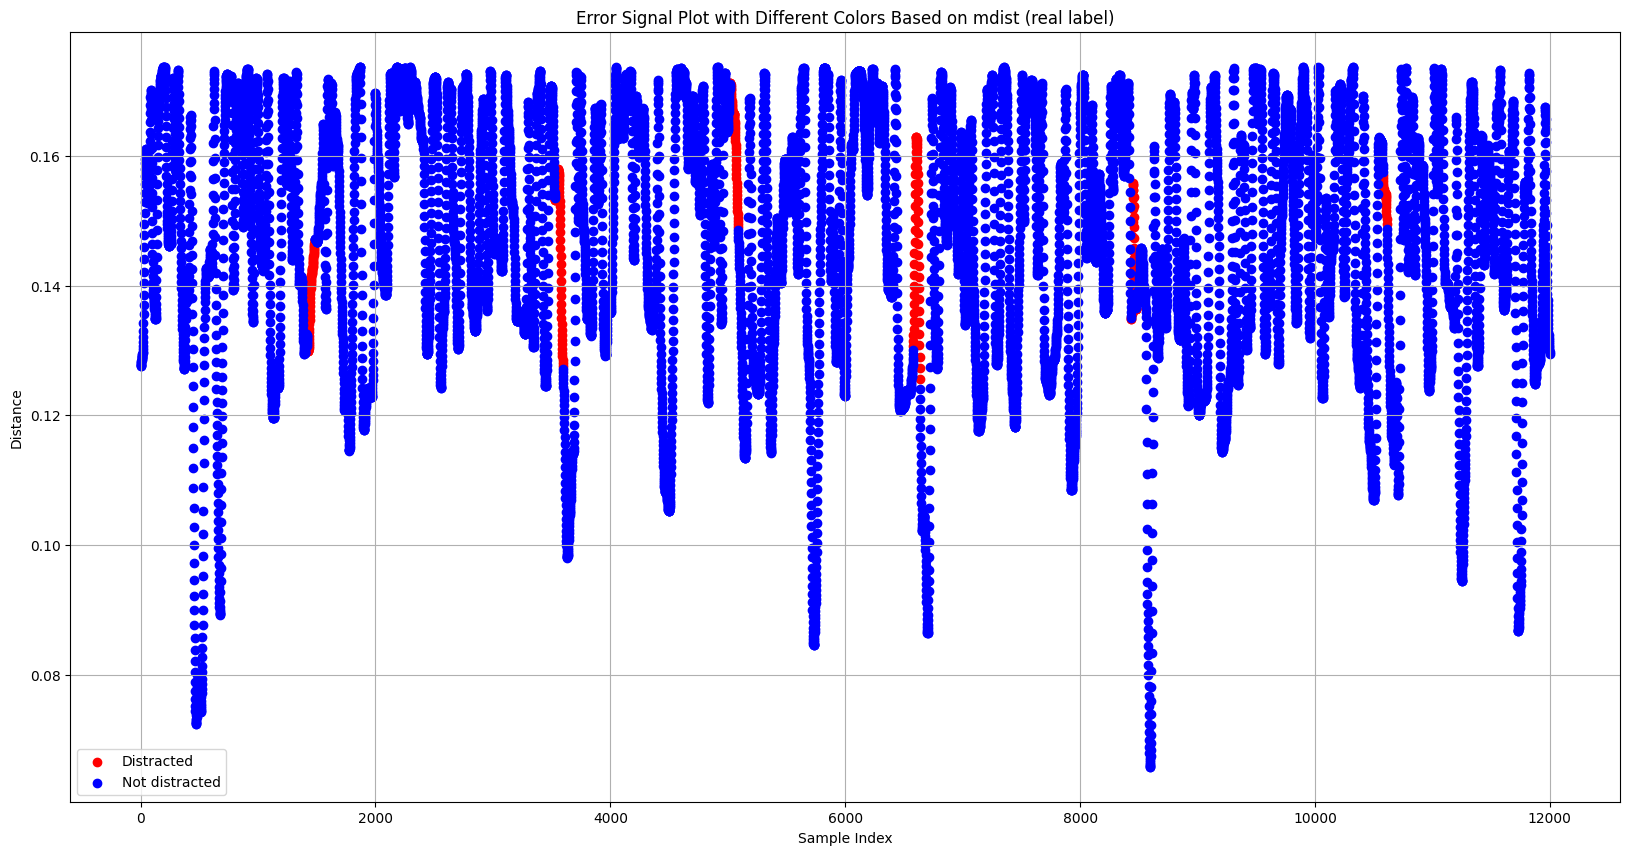

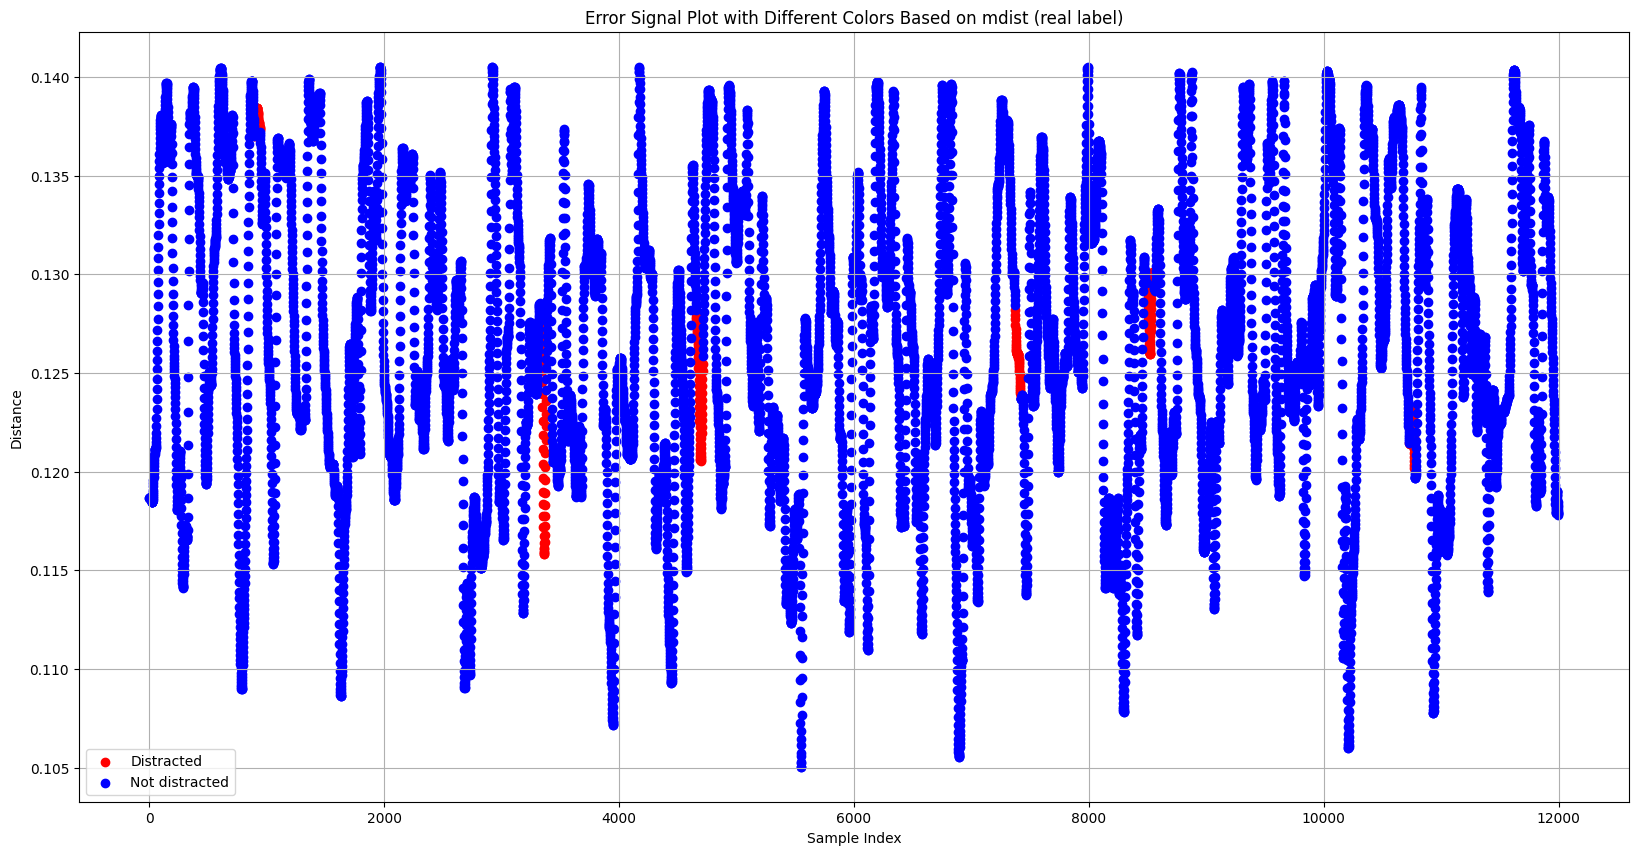

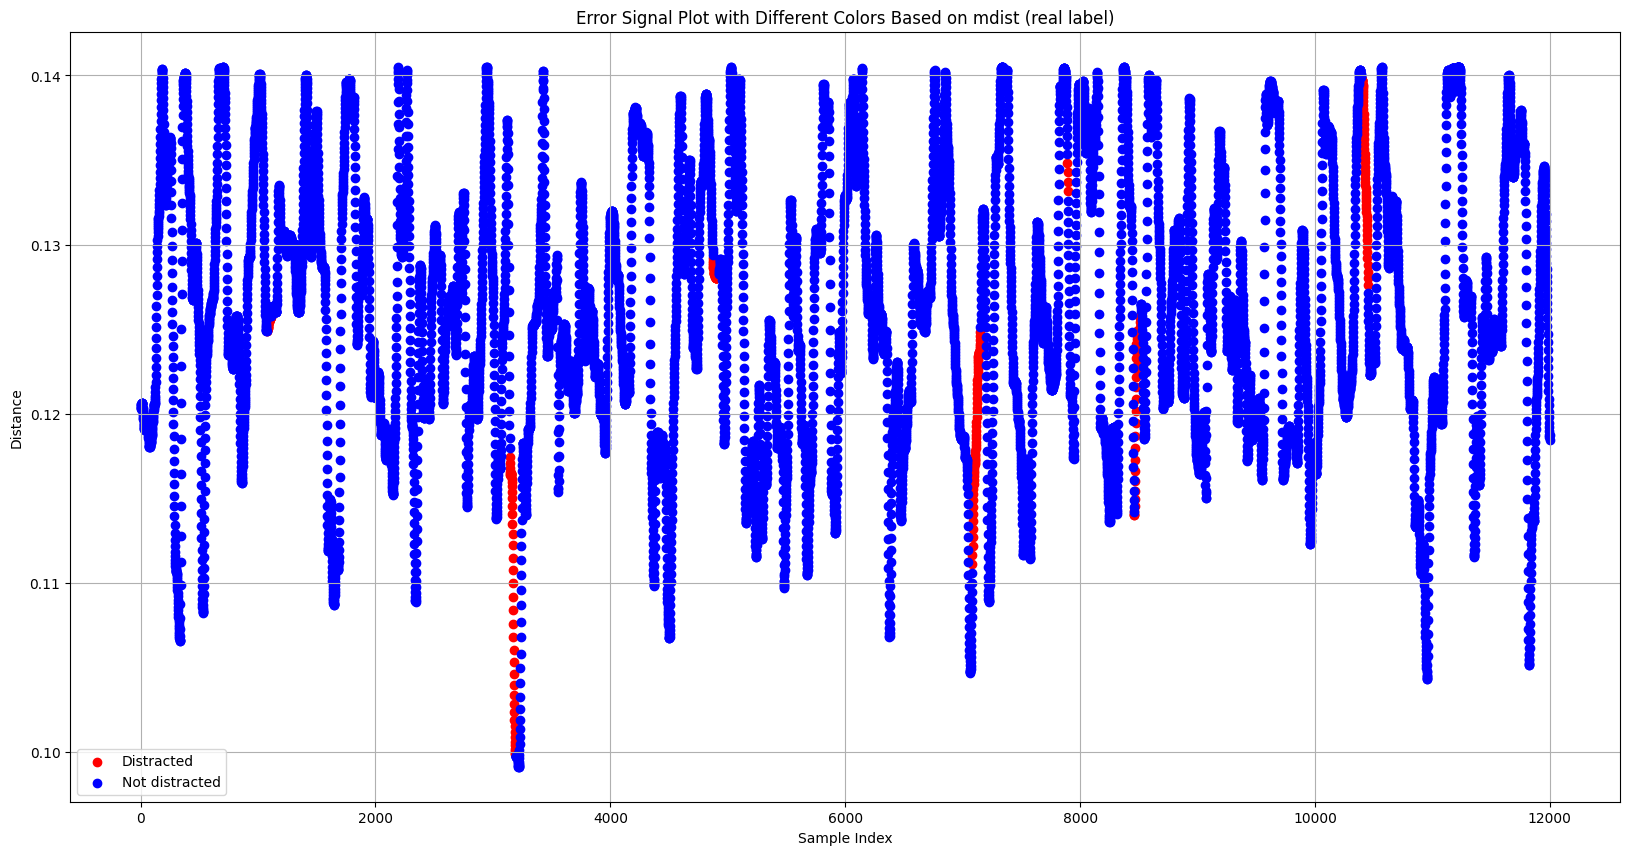

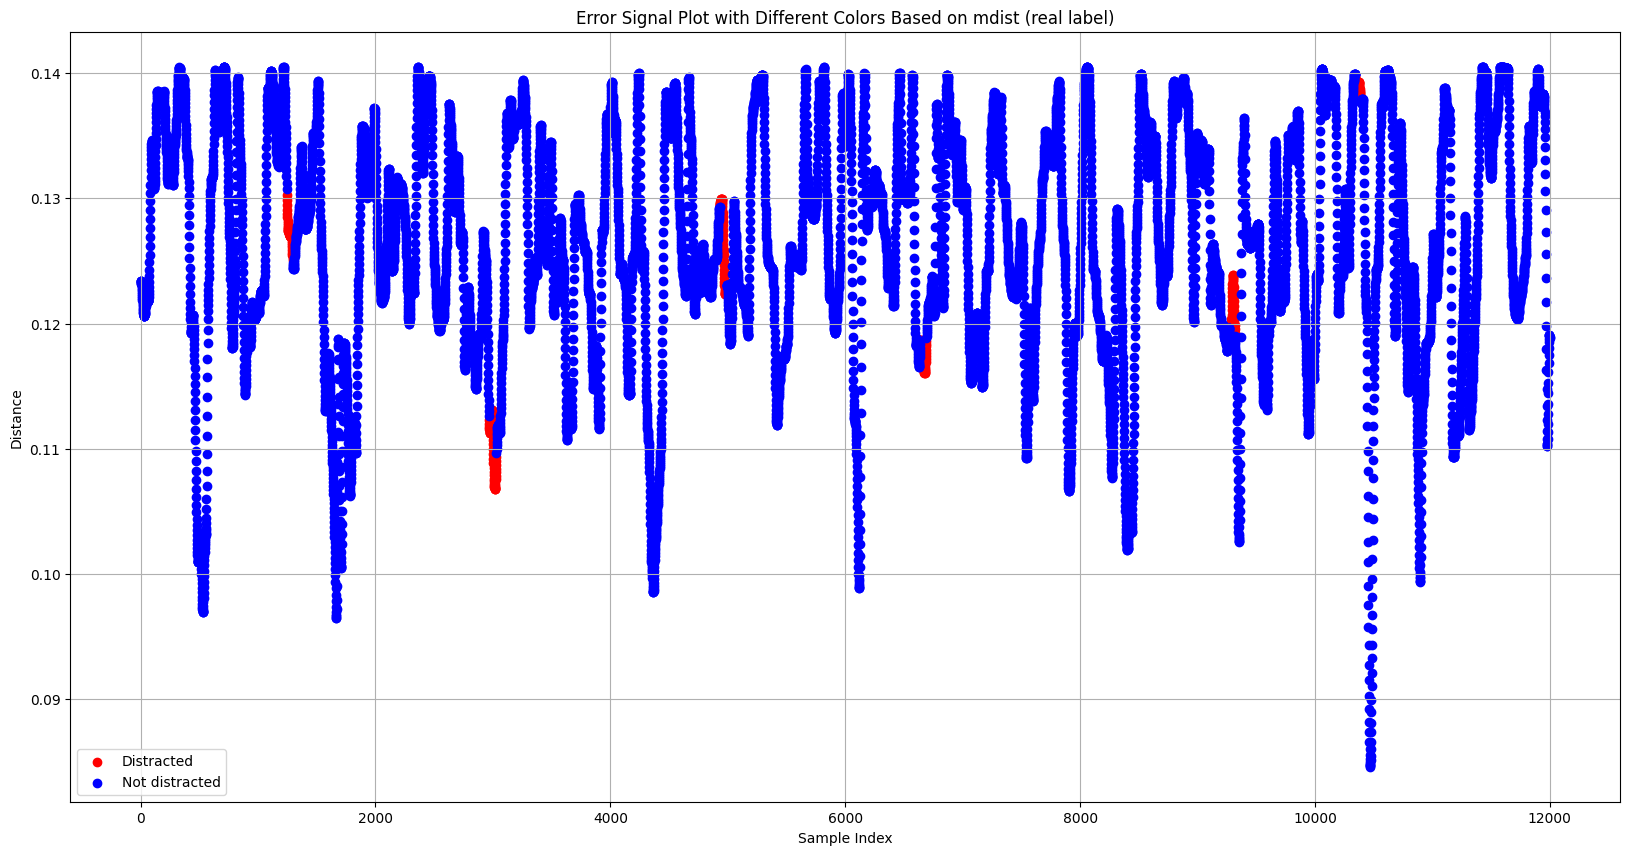

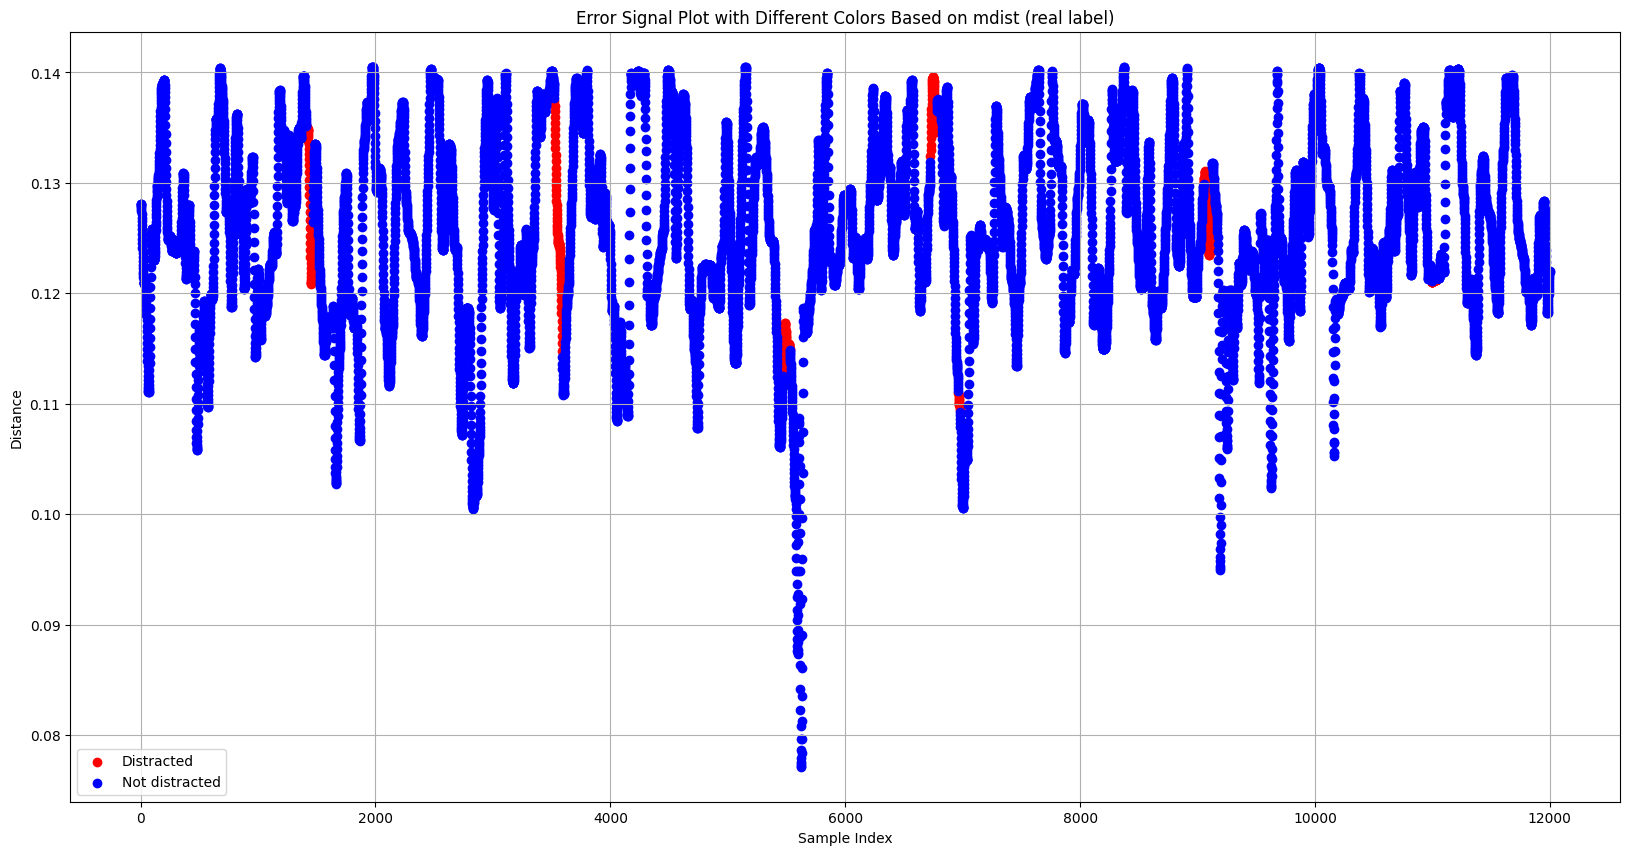

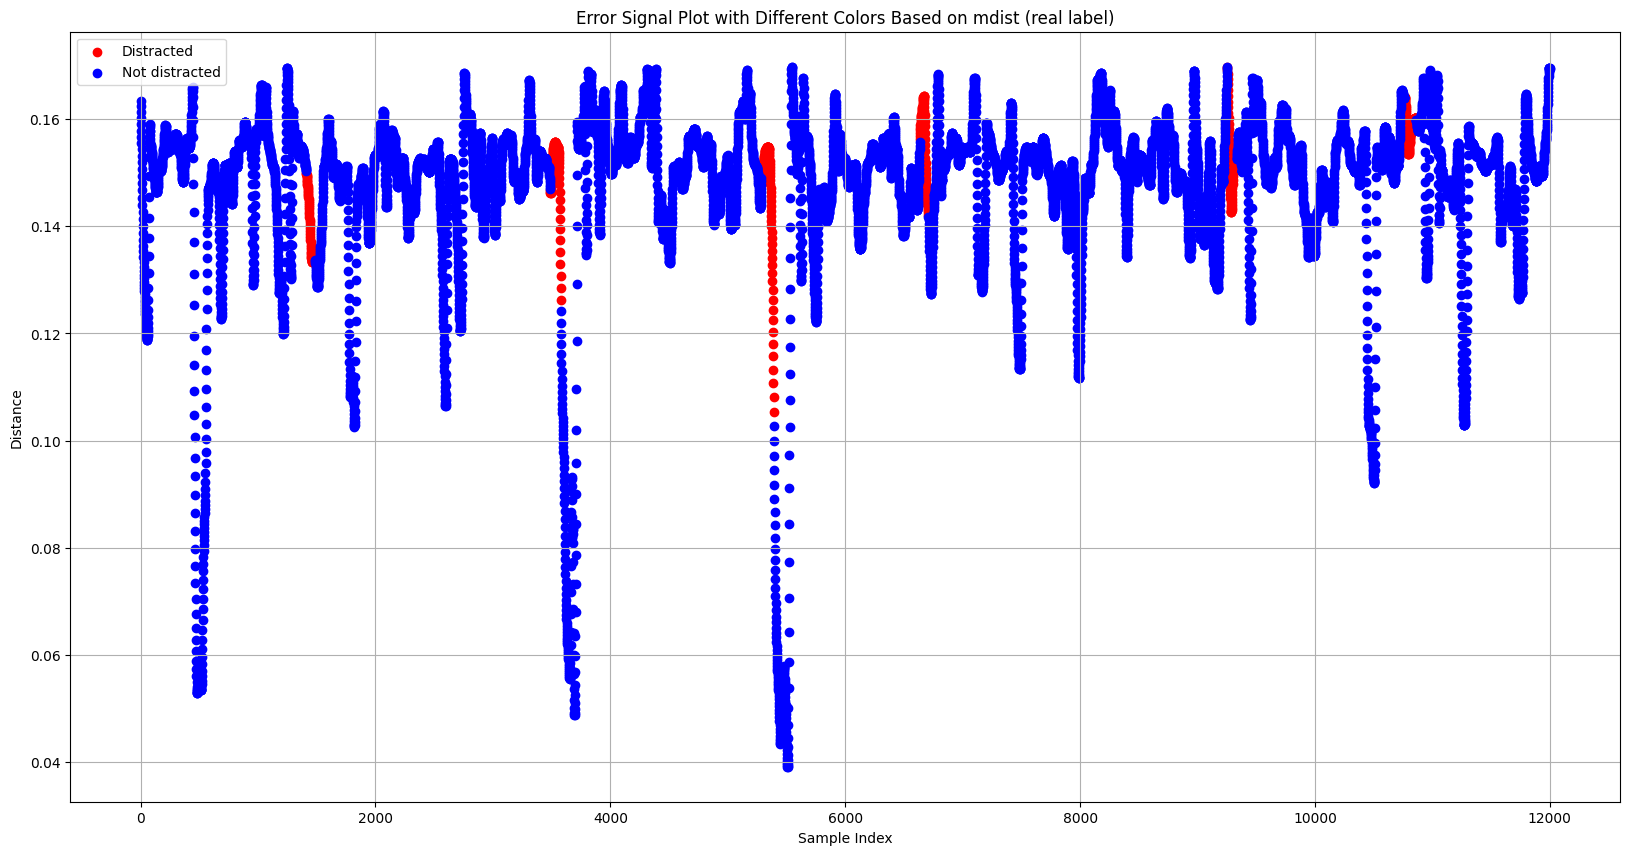

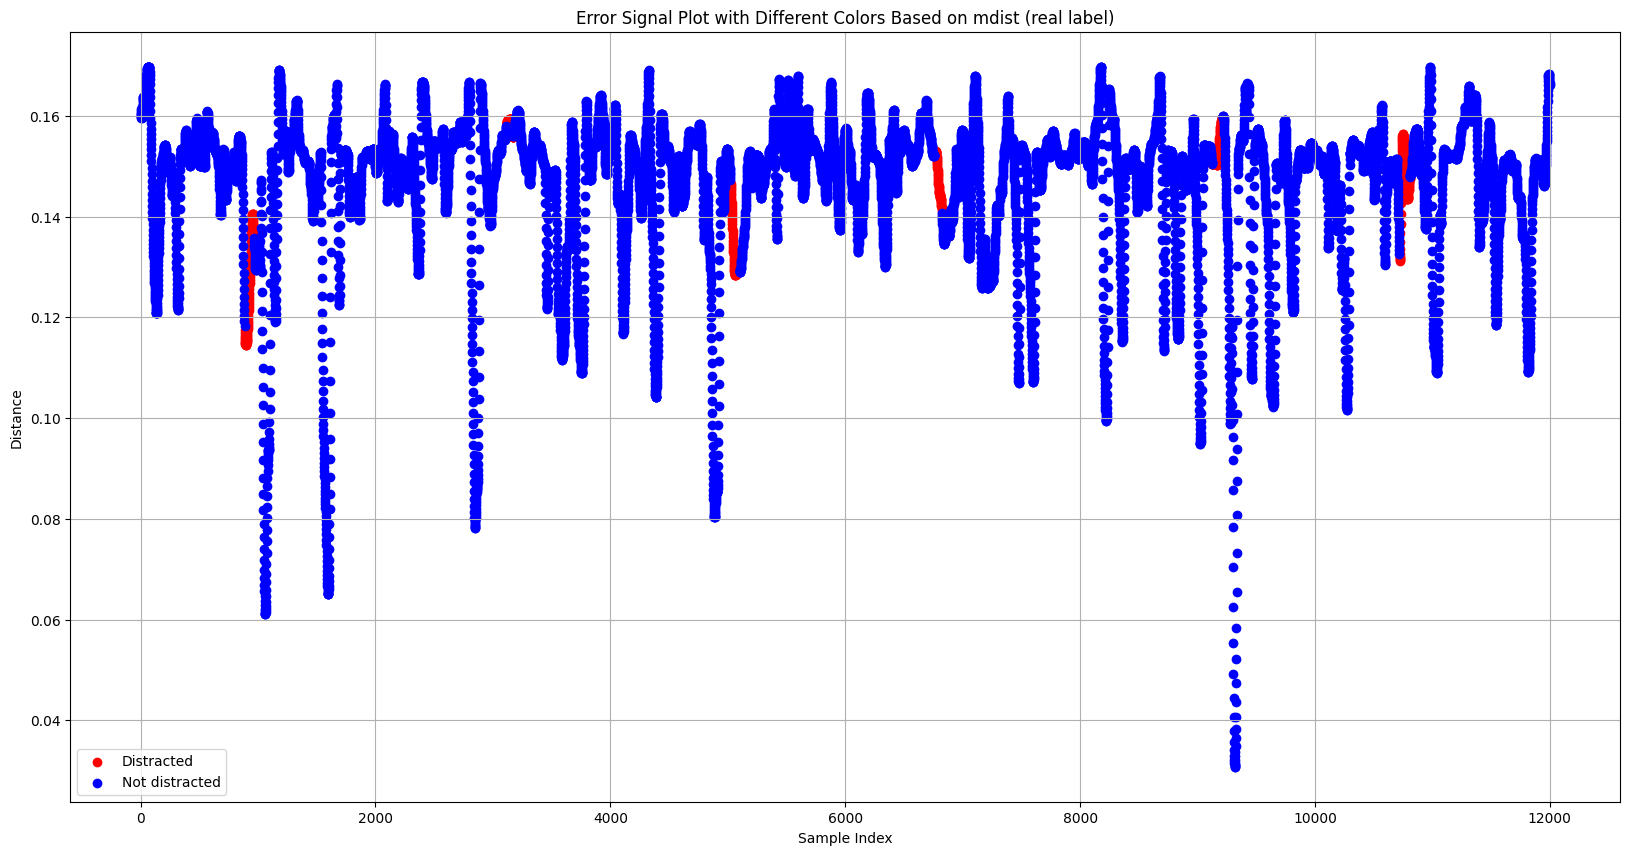

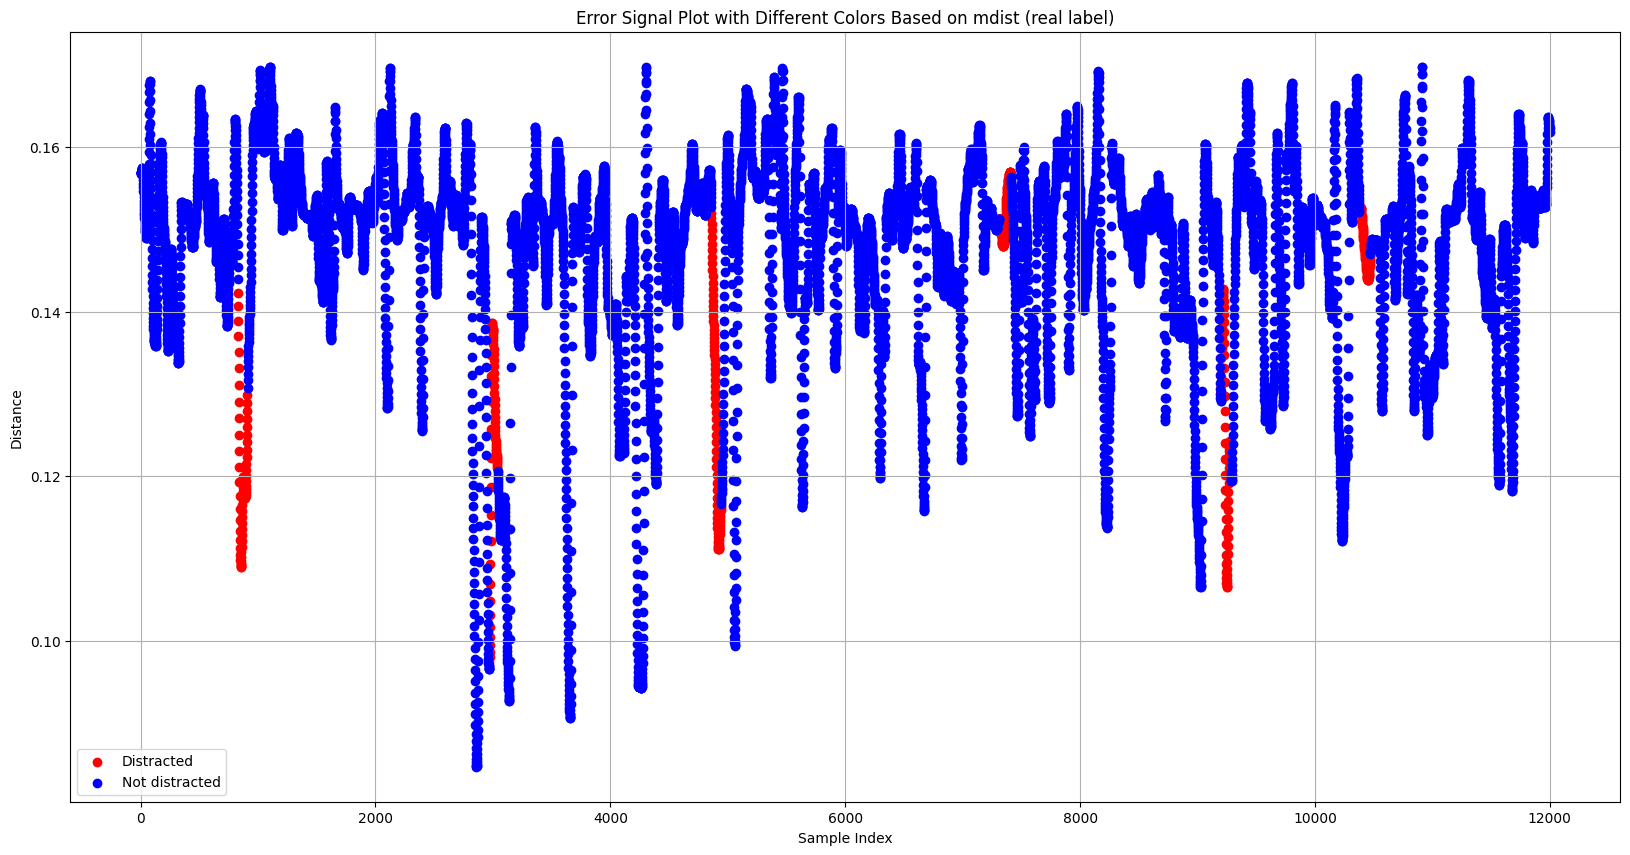

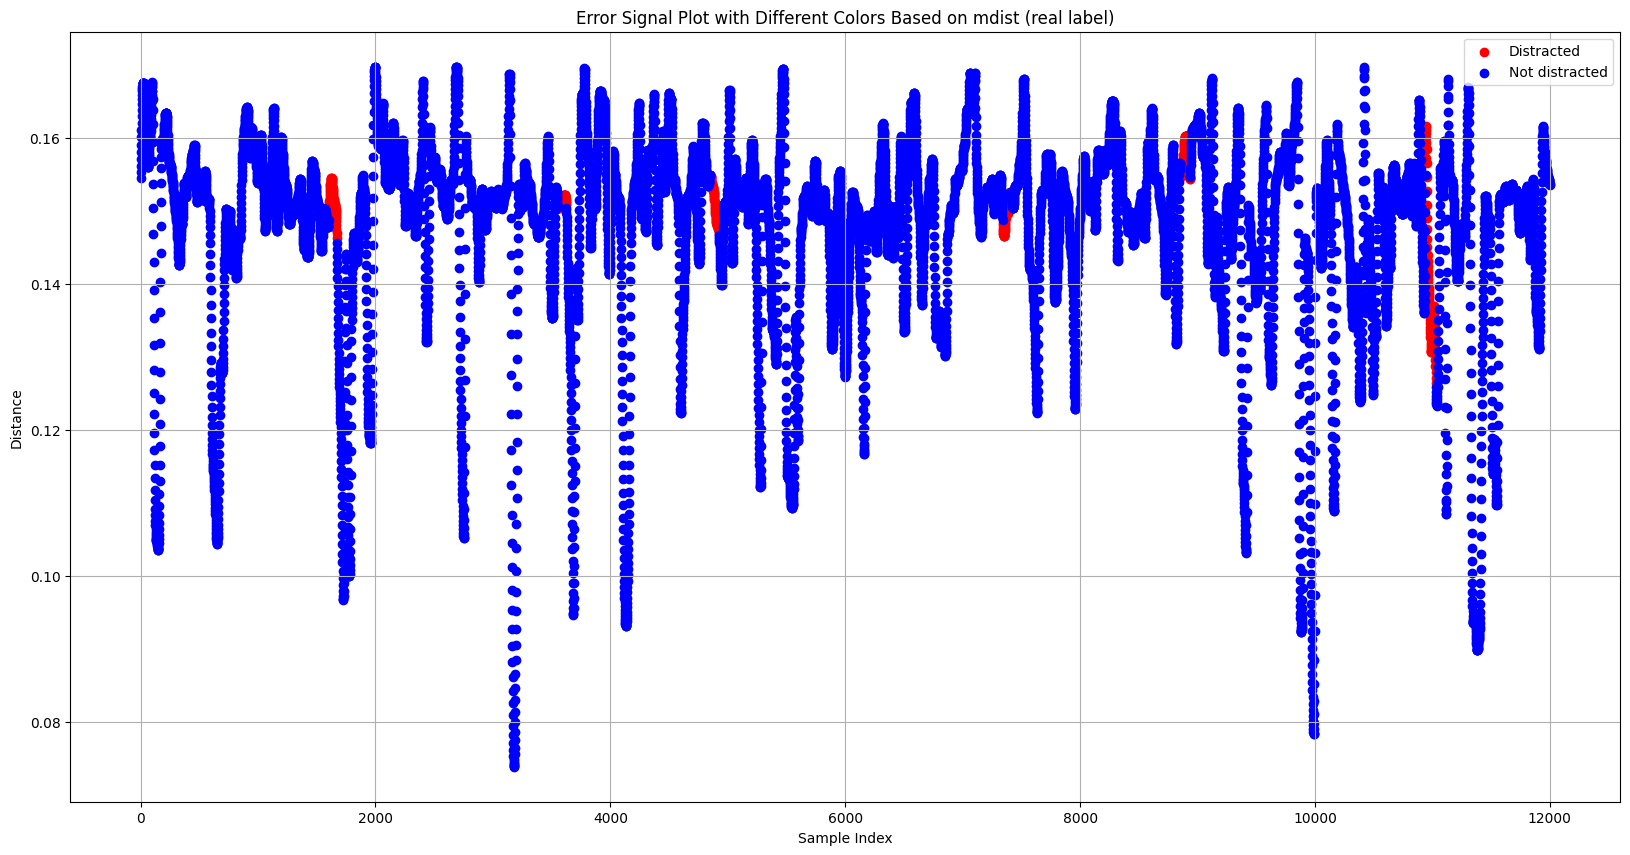

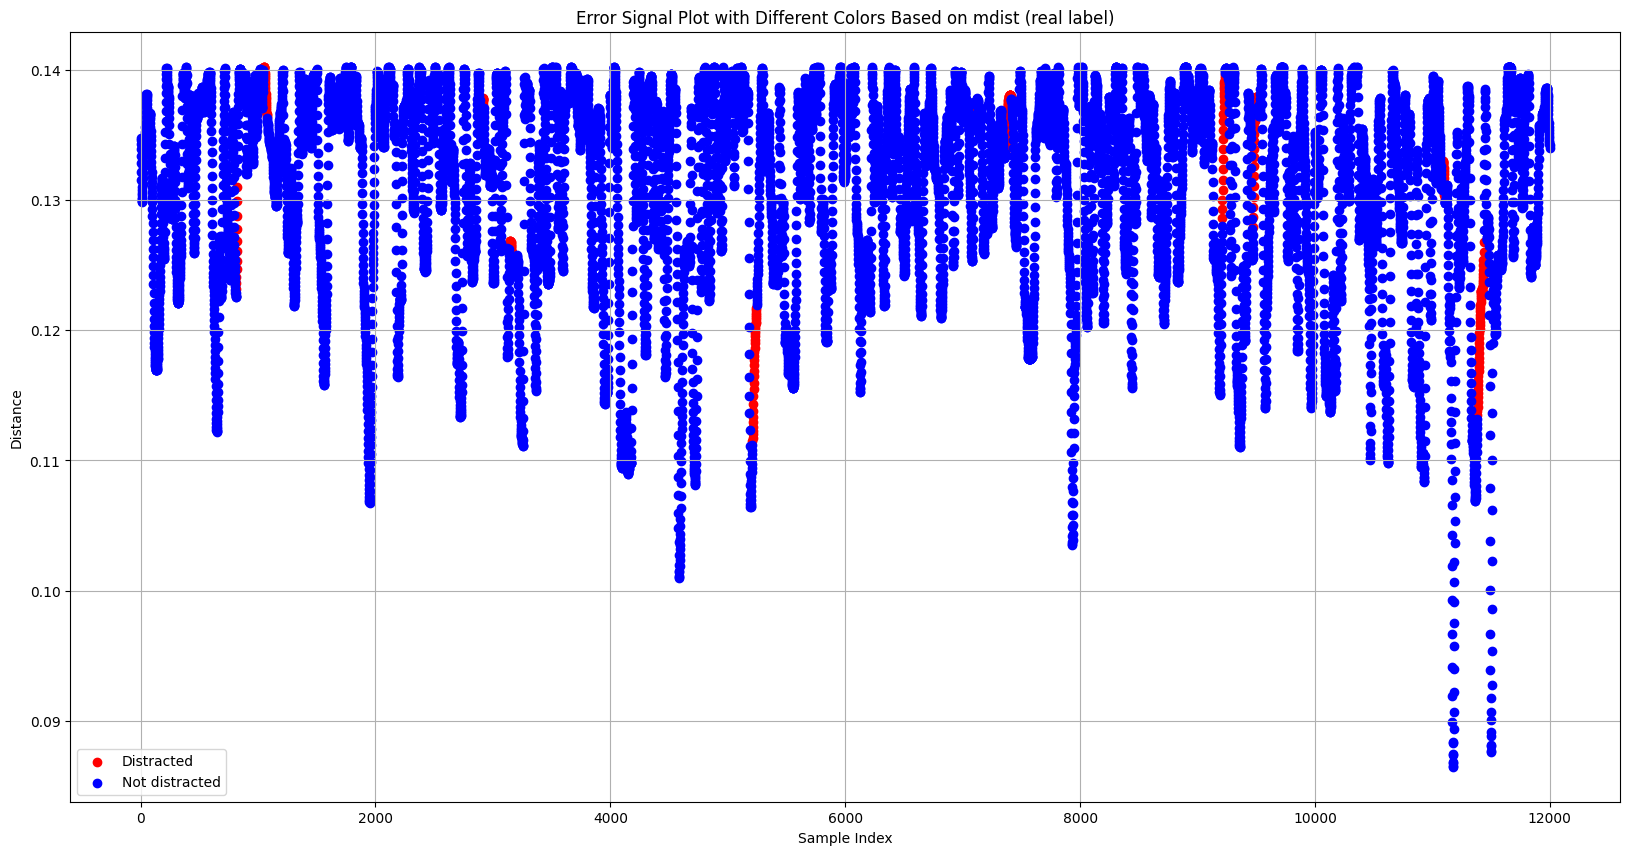

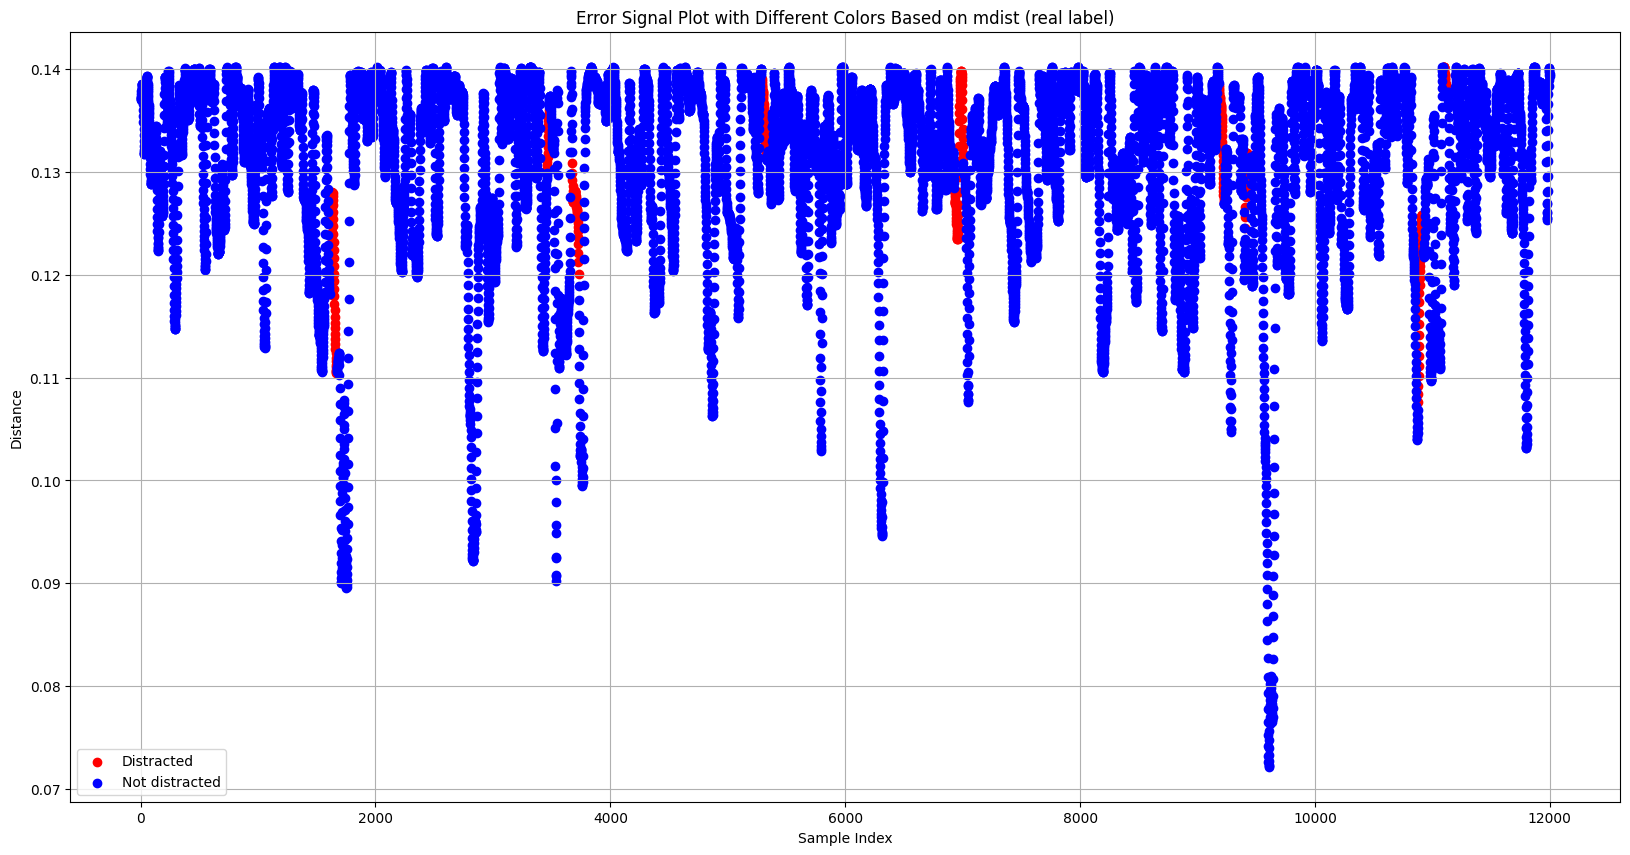

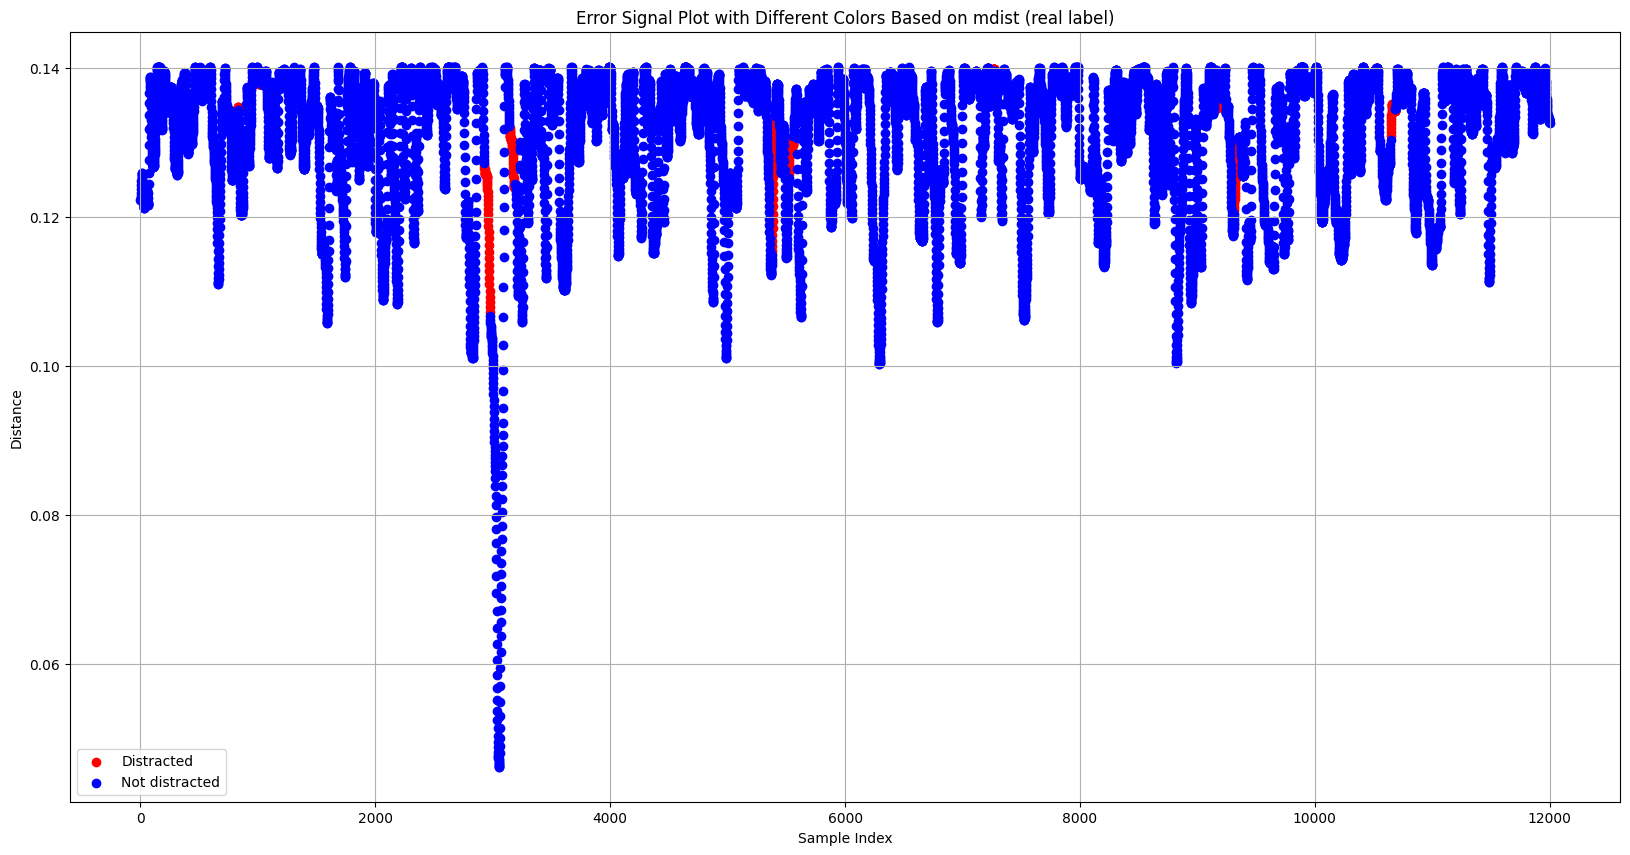

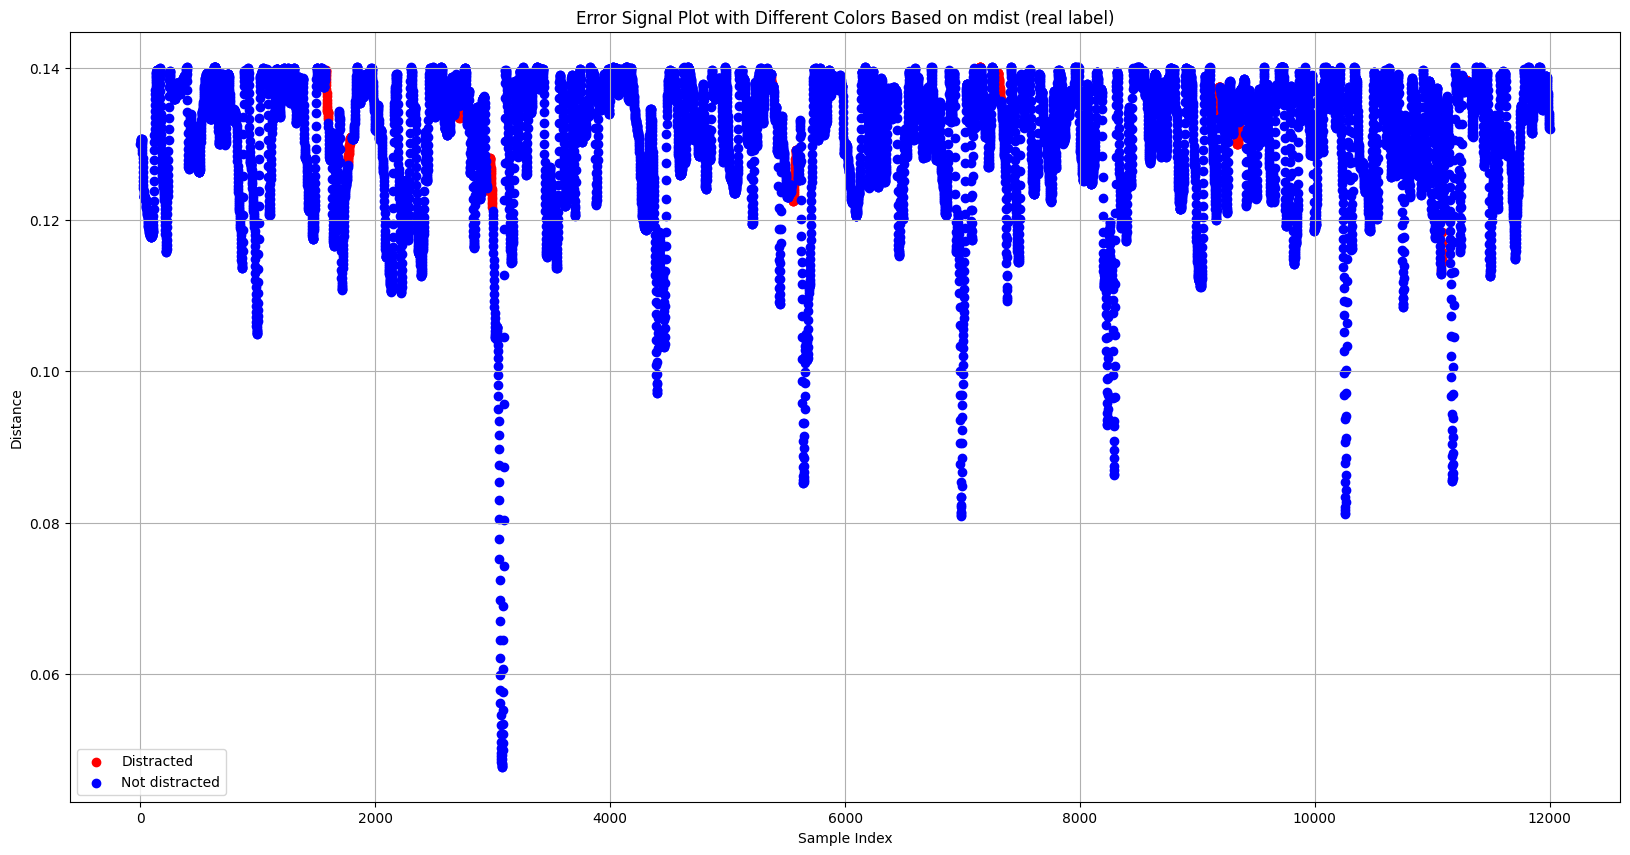

In [47]:
def plot_run(tc_test_col, distances_run):
# Create a mask for tc_test == 1 and tc_test == 0
    mask_1 = tc_test_col == 1
    mask_0 = tc_test_col == 0

# Plotting
    plt.figure(figsize=(20, 10))
    plt.scatter(np.arange(len(distances_run))[mask_1], distances_run[mask_1], color='red', label='Distracted')
    plt.scatter(np.arange(len(distances_run))[mask_0], distances_run[mask_0], color='blue', label='Not distracted')
    plt.grid()
# Add labels and title
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.title('Error Signal Plot with Different Colors Based on mdist (real label)')
    plt.legend()
    plt.show()


for idx in range(40):
    tc_test_col = tc_test[:, idx]
    distances_run = all_probabilities[idx, :]
    plot_run(tc_test_col, distances_run)

In [30]:
tc_test.shape

(12000, 40)

In [31]:
# what i want to do: compute th scores for the all_probabilities
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

for idx, probabilities in enumerate(all_probabilities):
    # Threshold probabilities to get binary predictions
    binary_predictions = (probabilities < 0.12).astype(int)
    intermediary_f1_score = f1_score(tc_test[:, idx], binary_predictions)
    print(f"Run: {idx}, F1 Score: {intermediary_f1_score}")

Run: 0, F1 Score: 0.04889228418640183
Run: 1, F1 Score: 0.06862745098039216
Run: 2, F1 Score: 0.0844205679201842
Run: 3, F1 Score: 0.075177304964539
Run: 4, F1 Score: 0.0
Run: 5, F1 Score: 0.0
Run: 6, F1 Score: 0.0053404539385847796
Run: 7, F1 Score: 0.0
Run: 8, F1 Score: 0.0861244019138756
Run: 9, F1 Score: 0.20917431192660552
Run: 10, F1 Score: 0.0
Run: 11, F1 Score: 0.06072874493927125
Run: 12, F1 Score: 0.050453098212098944
Run: 13, F1 Score: 0.14986443184619178
Run: 14, F1 Score: 0.08391608391608392
Run: 15, F1 Score: 0.146562371346233
Run: 16, F1 Score: 0.12593383137673425
Run: 17, F1 Score: 0.002359882005899705
Run: 18, F1 Score: 0.11490683229813664
Run: 19, F1 Score: 0.008921933085501859
Run: 20, F1 Score: 0.0
Run: 21, F1 Score: 0.0
Run: 22, F1 Score: 0.0
Run: 23, F1 Score: 0.0
Run: 24, F1 Score: 0.023759608665269043
Run: 25, F1 Score: 0.01652892561983471
Run: 26, F1 Score: 0.05417118093174431
Run: 27, F1 Score: 0.0
Run: 28, F1 Score: 0.014094432699083862
Run: 29, F1 Score: 0.0

In [32]:
import numpy as np

def compute_log_likelihood(probabilities, window_size=150, threshold=0):
    """
    Splits probabilities into time windows, computes total log likelihood
    for each window, and classifies the window.

    Parameters:
    - probabilities (list or numpy array): Vector of probabilities.
    - window_size (int): Number of samples per window.
    - threshold (float): Threshold for classifying the windows.

    Returns:
    - classifications (list): Classification of each window (0 or 1).
    - log_likelihoods (list): Log-likelihood values for each window.
    """
    # Ensure probabilities are a numpy array for easier slicing
    probabilities = np.array(probabilities)
    n_windows = len(probabilities) // window_size
    
    # Initialize lists to store results
    log_likelihoods = []
    classifications = []
    

    for i in range(n_windows):
        # Extract the current window
        window = probabilities[i * window_size:(i + 1) * window_size]
        
        # Compute log-likelihood (sum of log probabilities)
        # Use np.log to calculate log probabilities
        log_likelihood = np.sum(np.log(window))
        log_likelihoods.append(log_likelihood)
        
        # Classify based on threshold
        classification = 1 if log_likelihood > threshold else 0
        classifications.append(classification)
    
    return classifications, log_likelihoods

# Example usage
probabilities = np.random.rand(1500)  # Replace with your probability vector
threshold = -100  # Example threshold
classifications, log_likelihoods = compute_log_likelihood(all_probabilities[0], window_size=150, threshold=threshold)

print("Classifications:", classifications)
print("Log Likelihoods:", log_likelihoods)


Classifications: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Log Likelihoods: [-283.14621278385636, -294.1652209614417, -292.61383552411405, -286.66468225837207, -289.9430487393456, -278.4791626511193, -292.0956661590325, -283.7204202060419, -286.57585168318855, -290.07919479858606, -322.8108748834113, -296.50981565173333, -290.91993809464884, -286.32191029646407, -290.1664483485041, -299.66274764662796, -295.2120859874871, -286.8094894509951, -309.8751748530886, -305.92838998553407, -287.63574720179093, -285.1768244437881, -300.852797970428, -301.62034728868025, -292.08519514797, -286.06854804924023, -280.9734008410388, -303.9169099211945, -288.00818788347726, -304.7478736009448, -291.1322754463268, -283.4255037990191, -293.87862000357484, -303.9431155894894, -284.1436271067428, -289.1606978

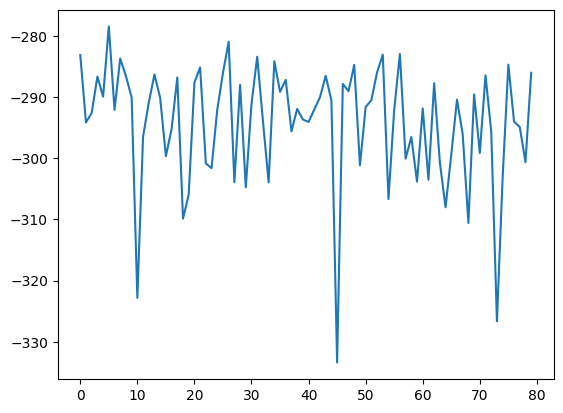

In [36]:
import numpy as np

def classify_windows(tc_test, window_size=150):
    """
    Splits tc_test into windows and classifies each window as:
    - 1 if the sum of the window is not 0.
    - 0 if the sum of the window is 0.

    Parameters:
    - tc_test (list or numpy array): Input vector to classify.
    - window_size (int): Number of samples per window.

    Returns:
    - classifications (list): Classification vector (0 or 1 for each window).
    """
    # Ensure tc_test is a numpy array for easier slicing
    tc_test = np.array(tc_test)
    n_windows = len(tc_test) // window_size
    
    # Initialize the classification vector
    classifications = []
    
    for i in range(n_windows):
        # Extract the current window
        window = tc_test[i * window_size:(i + 1) * window_size]
        
        # Classify the window based on the sum
        classification = 1 if np.sum(window) != 0 else 0
        classifications.append(classification)
    
    return classifications

classifications = classify_windows(tc_test_col, window_size=150)

print("Classifications:", classifications)


Classifications: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


[ 5  6 20 21 32 44 45 56 57 72 73]


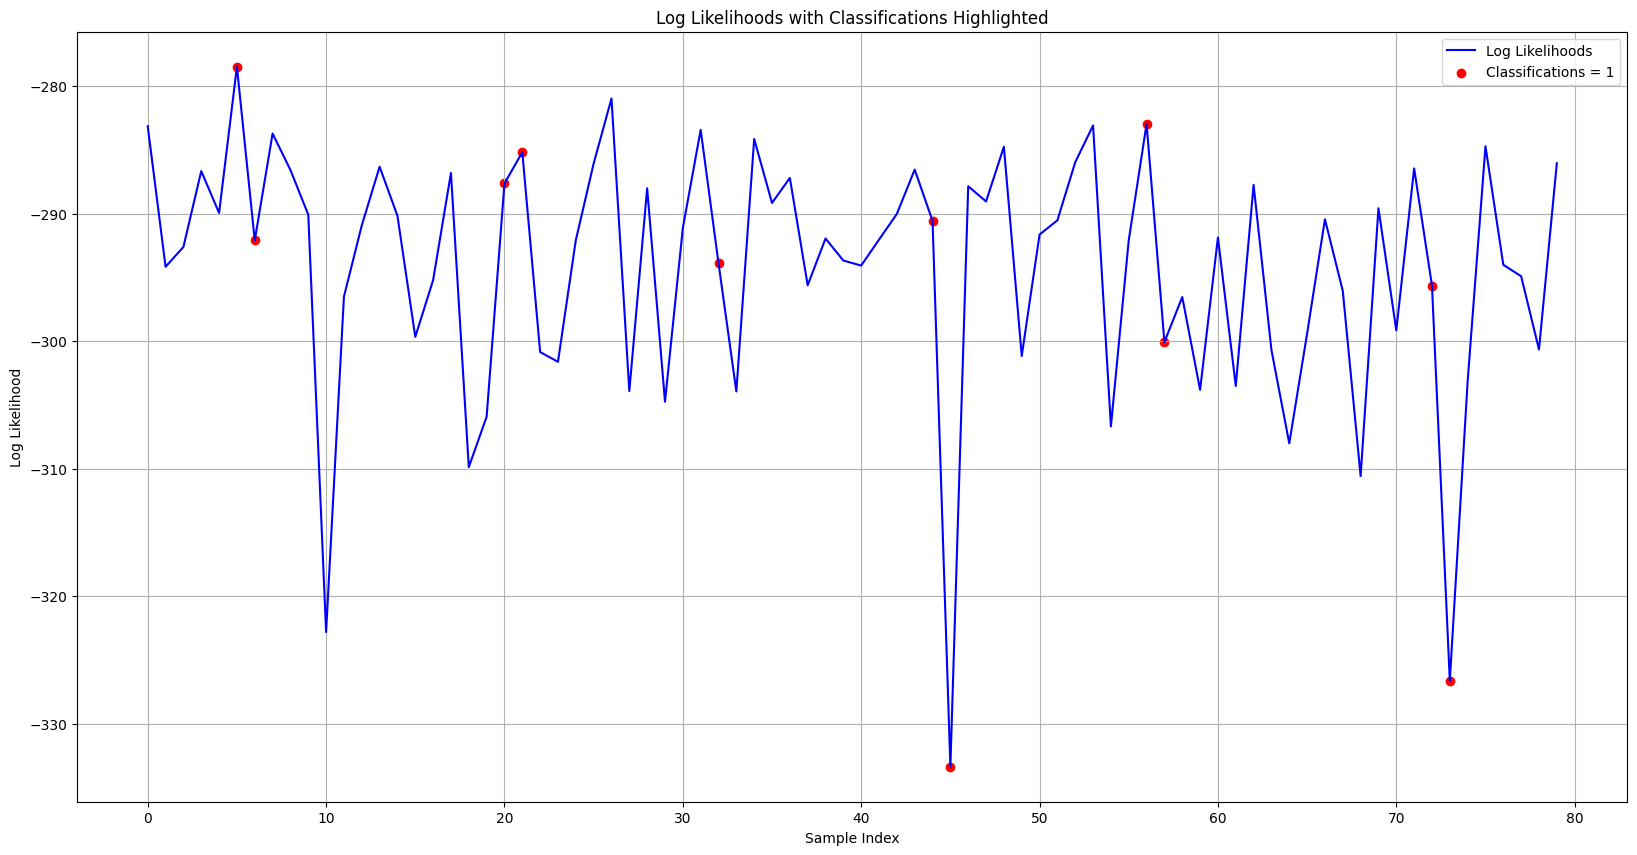

In [44]:
plt.figure(figsize=(20, 10))

# Plot all log likelihoods as a line plot
plt.plot(log_likelihoods, color='blue', label='Log Likelihoods')

# Identify indices where classifications are 1
highlight_indices = np.where(np.array(classifications) == 1)[0]

print(highlight_indices)

# Scatter plot the log likelihoods where classifications are 1
plt.scatter(highlight_indices, np.array(log_likelihoods)[highlight_indices], 
            color='red', label='Classifications = 1')

# Add grid, legend, and labels
plt.grid()
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihoods with Classifications Highlighted")

plt.show()